# More Visualizations
More optimised and focused on visualisations relevant for results interpretation

In [1]:
# GENERAL IMPORTS
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle

## Generate data (run only once)

In [ ]:
# # Patient list ID
# pat_list = ['SARK012', 'SARK018', 'SARK019', 'SARK034', 'SARK017', 'SARK021', 'SARK025', 
#             'SARK041', 'SARK011', 'SARK027', 'SARK029', 'SARK032', 'SARK033', 'SARK037', 'SARK052', 'SARK059']
# # pat_list = ['SARK012', 'SARK018', 'SARK019', 'SARK034', 'SARK021', 'SARK025', 
#             # 'SARK041', 'SARK027', 'SARK029', 'SARK032', 'SARK033', 'SARK037', 'SARK059']

# # Read dataset
# file_path = 'TCR_seq_new.xlsx' 

# # Dictionaries with all the sequences
# all_counts = {}
# all_freq = {}

# # Dictionaries restricted to the top 100 sequences
# all_counts_100 = {}
# all_original_freq_100 = {}  # Original frequencies
# all_recalc_freq_100 = {}  # Frequencies calculated over the 100 top ranked sequences

# # Load the Excel file for each patient
# for i, pat in enumerate(pat_list):
#     # if pat == 'SARK017' or pat == 'SARK052' or pat =='SARK011':
#     #     continue
#     # else:
#         # Read excel sheet (equivalent to 1 patient)
#         sheet_index = 2*i
#         counts_df = pd.read_excel(file_path, sheet_name=sheet_index, engine='openpyxl')
#         freq_df = pd.read_excel(file_path, sheet_name=sheet_index+1, engine='openpyxl')

#         # Remove rows where 'CDR3.amino.acid.sequence' is NaN
#         counts_df = counts_df.dropna(subset=['CDR3.amino.acid.sequence'])
#         freq_df = freq_df.dropna(subset=['CDR3.amino.acid.sequence'])

#         # Select columns containing 'Day' (time points)
#         counts_df = counts_df.filter(regex='Day').copy()
#         freq_df = freq_df.filter(regex='Day').copy()

#         # Convert all values to numeric (important for summing later)
#         counts_df = counts_df.apply(pd.to_numeric, errors='coerce')
#         freq_df = freq_df.apply(pd.to_numeric, errors='coerce')

#         # Replace missing values with a 0 if the freq data has a 0
#         counts_df = counts_df.where(~(counts_df.isna()), 0)
#         freq_df = freq_df.where(~(freq_df.isna()), 0)

#         # Rename columns by extracting the numeric part and converting to integer
#         counts_df.columns = [int(col.split(' ')[1]) for col in counts_df.columns]
#         freq_df.columns = [int(col.split(' ')[1]) for col in freq_df.columns]

#         # Ensure numbers are in float type
#         counts_df = counts_df.astype(float)
#         freq_df = freq_df.astype(float)

#         counts_df["Total"] = counts_df.sum(axis=1)
#         freq_df["Total"] = freq_df.sum(axis=1)

#         # Add an ID column - To later be able to identify the sequences if necessary
#         counts_df['id'] = ['TCR_' + str(j + 1) for j in range(len(counts_df))]
#         freq_df['id'] = ['TCR_' + str(j + 1) for j in range(len(freq_df))]

#         # Sort by counts of 'Day 0' cols
#         counts_df = counts_df.sort_values(by=counts_df.columns[0], ascending=False, kind="mergesort").reset_index(drop=True)
#         freq_df = freq_df.sort_values(by=freq_df.columns[0], ascending=False, kind="mergesort").reset_index(drop=True)
    
#         # To check how many sequences we potentially are leaving out 
#         # print(f'\nFor {pat}:')
#         # print(f'    Number of seqs >0 on Day 0: {(counts_df.iloc[:, 0] > 0).sum()}')
#         # print(f'    Number of seqs >50 on Day 0: {(counts_df.iloc[:, 0] > 50).sum()}')
#         # print(f'    Number of seqs =0 on Day 0 BUT >50 on Total: {((counts_df.iloc[:, 0] == 0) & (counts_df.iloc[:, -2] > 50)).sum()}')

#         # Keep top 100 ranked sequences (Constrained on max num of seg for pat SARK018 = 101)
#         counts_100 = counts_df.copy().head(100)
#         counts_100_ids = counts_100["id"].tolist()
        
#         original_freq_100 = freq_df.copy().head(100)
#         freq_100_ids = original_freq_100["id"].tolist()
#         # print(f'    Top 100 seqs: {counts_100_ids}')

#         # Frequency recalculation for top 100 sequences
#         recalc_freq = counts_100.drop(columns=["Total"]).drop(columns=["id"]).div(counts_100.drop(columns=["Total"]).drop(columns=["id"]).sum(axis=0), axis=1) 
#         recalc_freq["id"] = counts_100["id"]
        
#         # Melt the dataframe for plotting (id, time, counts)
#         counts_m = counts_df.drop(columns=["Total"]).melt(id_vars='id', var_name='time', value_name='counts').copy()
#         freq_m = freq_df.drop(columns=["Total"]).melt(id_vars='id', var_name='time', value_name='counts').copy()
        
#         counts_100_m = counts_100.drop(columns=["Total"]).melt(id_vars='id', var_name='time', value_name='counts').copy()
#         original_freq_100_m = original_freq_100.drop(columns=["Total"]).melt(id_vars='id', var_name='time', value_name='counts').copy()
#         recalc_freq_100_m = recalc_freq.melt(id_vars='id', var_name='time', value_name='counts').copy()
        
#         # Store in dictionary
#         all_counts[pat] = counts_m
#         all_freq[pat] = freq_m

#         all_counts_100[pat] = counts_100_m
#         all_original_freq_100[pat] = original_freq_100_m
#         all_recalc_freq_100[pat] = recalc_freq_100_m
#         # if pat=='SARK021':
#         #     print(recalc_freq_100_m)


In [ ]:
# # Function to save the dictionaries to disk
# def save_dictionaries_to_disk(dictionaries, file_paths):
#     """
#     Save dictionaries to disk using pickle.

#     Parameters:
#     - dictionaries (list): List of dictionaries to save.
#     - file_paths (list): List of file paths where each dictionary will be saved.
#     """
#     for dictionary, file_path in zip(dictionaries, file_paths):
#         with open(file_path, 'wb') as file:
#             pickle.dump(dictionary, file)
#             print(f"Saved to {file_path}")
    
# # List of dictionaries to save
# dictionaries_to_save = [all_counts, all_freq, all_counts_100, all_original_freq_100, all_recalc_freq_100]
# # List of corresponding file paths
# file_paths = ['all_counts.pkl', 'all_freq.pkl', 'all_counts_100.pkl', 'all_original_freq_100.pkl', 'all_recalc_freq_100.pkl']

# # Save the dictionaries
# save_dictionaries_to_disk(dictionaries_to_save, file_paths)


Saved to all_counts.pkl
Saved to all_freq.pkl
Saved to all_counts_100.pkl
Saved to all_original_freq_100.pkl
Saved to all_recalc_freq_100.pkl


## Load data

In [2]:
# Function to load the dictionaries from disk
def load_dictionaries_from_disk(file_paths):
    """
    Load dictionaries from disk using pickle.

    Parameters:
    - file_paths (list): List of file paths to load dictionaries from.

    Returns:
    - List of loaded dictionaries.
    """
    loaded_dictionaries = []
    for file_path in file_paths:
        with open(file_path, 'rb') as file:
            loaded_dict = pickle.load(file)
            loaded_dictionaries.append(loaded_dict)
            print(f"Loaded from {file_path}")
    return loaded_dictionaries

# List of file paths to load from
file_paths_to_load = ['all_counts.pkl', 'all_freq.pkl', 'all_counts_100.pkl', 'all_original_freq_100.pkl', 'all_recalc_freq_100.pkl']

# Load the dictionaries
loaded_dictionaries = load_dictionaries_from_disk(file_paths_to_load)

# Unpack the loaded dictionaries
all_counts, all_freq, all_counts_100, all_original_freq_100, all_recalc_freq_100 = loaded_dictionaries


Loaded from all_counts.pkl
Loaded from all_freq.pkl
Loaded from all_counts_100.pkl
Loaded from all_original_freq_100.pkl
Loaded from all_recalc_freq_100.pkl


## Other functions

In [7]:
# INTERPOLATION FUNCTION
import math
from scipy.interpolate import interp1d

def interpolate_matrix(matrix, step=10):
    original_cols = np.array(matrix.columns, dtype=float)
    
    start = original_cols[0]
    end = original_cols[-1]
    target_end = math.trunc(end/10)*10
    
    target_columns = np.arange(start, target_end + step, step)
    
    matrix_values = matrix.values
    n_rows = matrix_values.shape[0]
    
    interpolated_matrix = np.zeros((n_rows, len(target_columns)))
    
    for i in range(n_rows):
        f = interp1d(original_cols, matrix_values[i], kind='linear', fill_value='extrapolate')
        interpolated_matrix[i] = f(target_columns)
    
    interpolated_df = pd.DataFrame(interpolated_matrix, index=matrix.index, columns=target_columns)
    
    return interpolated_df

# Function to apply interpolation to a melted dataframe
def interpolate_melted_df(melted_df, step=10):
    # Convert from long to wide format
    wide_df = melted_df.pivot(index="id", columns="time", values="counts")

    # Apply interpolation function
    interpolated_wide_df = interpolate_matrix(wide_df, step=step)

    # Convert back to long format (melt)
    # interpolated_long_df = interpolated_wide_df.reset_index().melt(id_vars="id", var_name="time", value_name="counts")

    return interpolated_wide_df

In [8]:
interpolated = {}
for pat, df in all_counts_100.items():
    interpolated[pat] = interpolate_melted_df(df)
print('Count interpolation done')
    
interpolated_recalc_freq = {}
for pat, df in all_recalc_freq_100.items():
    interpolated_recalc_freq[pat] = interpolate_melted_df(df)
print('Recalculated freqs interpolation done')

interpolated_original_freq = {}
for pat, df in all_original_freq_100.items():
    interpolated_original_freq[pat] = interpolate_melted_df(df)
print('Original freq interpolation done')


Count interpolation done
Recalculated freqs interpolation done
Original freq interpolation done


In [3]:
tensor_70 = np.load("tensors_center/tensor_70.npy")
tensor_100 = np.load("tensors_center/tensor_100.npy")
tensor_200 = np.load("tensors_center/tensor_200.npy")
tensor_300 = np.load("tensors_center/tensor_300.npy")


# we create a list with the tensors for more efficient coding
tensors = [tensor_70, tensor_100, tensor_200, tensor_300]
tensor_names = ['70', '100', '200', '300']

In [4]:
# Set global font sizes
plt.rcParams.update({
    "font.size": 25,        # Default text size
    "axes.titlesize": 25,   # Title size
    "axes.labelsize": 25,   # X and Y label size
    "xtick.labelsize": 23,  # X tick labels
    "ytick.labelsize": 23,  # Y tick labels
    "legend.fontsize": 18,  # Legend text size
    "figure.titlesize": 26,  # Suptitle font size
    "lines.linewidth": 2  # Increase line thickness
})
pat_list_70 = ['SARK012', 'SARK018', 'SARK019', 'SARK034', 'SARK021', 'SARK025', 
                'SARK041', 'SARK027', 'SARK029', 'SARK032', 'SARK033', 'SARK037', 'SARK059']
pat_list_100 =['SARK012', 'SARK018', 'SARK019', 'SARK034', 'SARK021', 'SARK025', 
                'SARK027', 'SARK029', 'SARK032', 'SARK037', 'SARK059']
pat_list_200 = ['SARK012', 'SARK019', 'SARK034', 'SARK021', 'SARK025', 
            'SARK027', 'SARK029', 'SARK032', 'SARK059']
pat_list_300 = ['SARK012', 'SARK034', 'SARK021', 'SARK025', 
            'SARK029', 'SARK059']


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from itertools import cycle  # Import cycle from itertools

def plot_time_series_for_all_patients_in_tensor(tensor, pat_list_group, available_time_points, tensor_group_label,log_axis=False, specific_seq=None):
    """
    Plots the time-series data for all patients within a specific tensor type group
    in a single figure, with each patient represented as a subplot in a grid.
    The color cycle restarts for each patient.

    Parameters:
    - tensor (np.array): A (Sequences × Time × Patients) matrix representing the time-series data for a tensor type.
    - pat_list_group (list): A list of patient identifiers in this tensor type group.
    - available_time_points (list): A list of time points available for slicing.
    - tensor_group_label (str): Label for the tensor type (e.g., "tensor_70", "tensor_100").
    """
    time_labels = [str(tp) for tp in available_time_points]
    time_indices = [tp // 10 for tp in available_time_points]  # Convert days to indices

    num_patients = len(pat_list_group)
    if log_axis==True:
        log_var=0.0000005
    else:
        log_var=0
    
    # Determine grid size for subplots: square or rectangular grid
    ncols = 3  # Set a fixed number of columns for the grid
    nrows = int(np.ceil(num_patients / ncols))  # Number of rows based on number of patients and columns
    
    fig, axes = plt.subplots(nrows, ncols, figsize=(5 * ncols, 5 * nrows))
    plt.suptitle(f'{tensor_group_label}', y=0.98)
    
    # Flatten axes if we have a 2D grid of subplots
    axes = axes.flatten()

    # Set Matplotlib's default color cycle to ensure consistent colors
    default_colors = mpl.rcParams['axes.prop_cycle'].by_key()['color']
    num_colors = len(default_colors)

    # Iterate through each patient in the tensor group and plot their data
    for i, pat in enumerate(pat_list_group):
        # Get the patient's data from the tensor
        patient_data = tensor[:, :, i]

        # Get the correct time range
        time_indices_clipped = min(time_indices[-1], patient_data.shape[1] - 1)
        time_points = np.arange(0, (time_indices_clipped + 1) * 10, 10)[:patient_data.shape[1]]

        # Restart the color cycle for each subplot (patient)
        color_cycle = cycle(default_colors)  # This ensures that the color cycle repeats as needed

        # Plot the patient's time-series data
        if specific_seq is None:
            for seq_idx in range(patient_data.shape[0]):  # Iterate through sequences
                color = next(color_cycle)  # Get next color in the cycle
                axes[i].plot(time_points, patient_data[seq_idx, :]+log_var, color=color)
        else:
            for seq_idx in specific_seq:  # Iterate through sequences
                color = next(color_cycle)  # Get next color in the cycle
                axes[i].plot(time_points, patient_data[seq_idx, :]+log_var, color=color)
        axes[i].set_title(f"{pat}")
        axes[i].set_xlabel("Time (Days)")

        if log_axis==True:
            axes[i].set_yscale('log')  # Apply log scale to Y-axis
        
        # Set y-label only on the first subplot of each row
        if i % ncols == 0:  # Check if it's the first subplot in the row
            axes[i].set_ylabel("Frequency")
        axes[i].grid(False)

    # Hide unused subplots if the grid is larger than the number of patients
    for j in range(num_patients, len(axes)):
        axes[j].axis('off')

    # Set common xlabel for all subplots
    # axes[-1].set_xlabel("Time (Days)")
    plt.tight_layout()

    # Save the figure
    # if log_axis==True:
    #     plt.savefig(f"{tensor_group_label}_LOG_time_series.pdf", format="pdf", bbox_inches="tight")
    #     plt.savefig(f"{tensor_group_label}_LOG_time_series.png", format="png", bbox_inches="tight")
    # else:
    #     plt.savefig(f"{tensor_group_label}_time_series.pdf", format="pdf", bbox_inches="tight")
    #     plt.savefig(f"{tensor_group_label}_time_series.png", format="png", bbox_inches="tight")
    plt.show()


## Specific sequences per tensor

Processing tensor_300
Patient list for tensor_300: ['SARK012', 'SARK034', 'SARK021', 'SARK025', 'SARK029', 'SARK059']


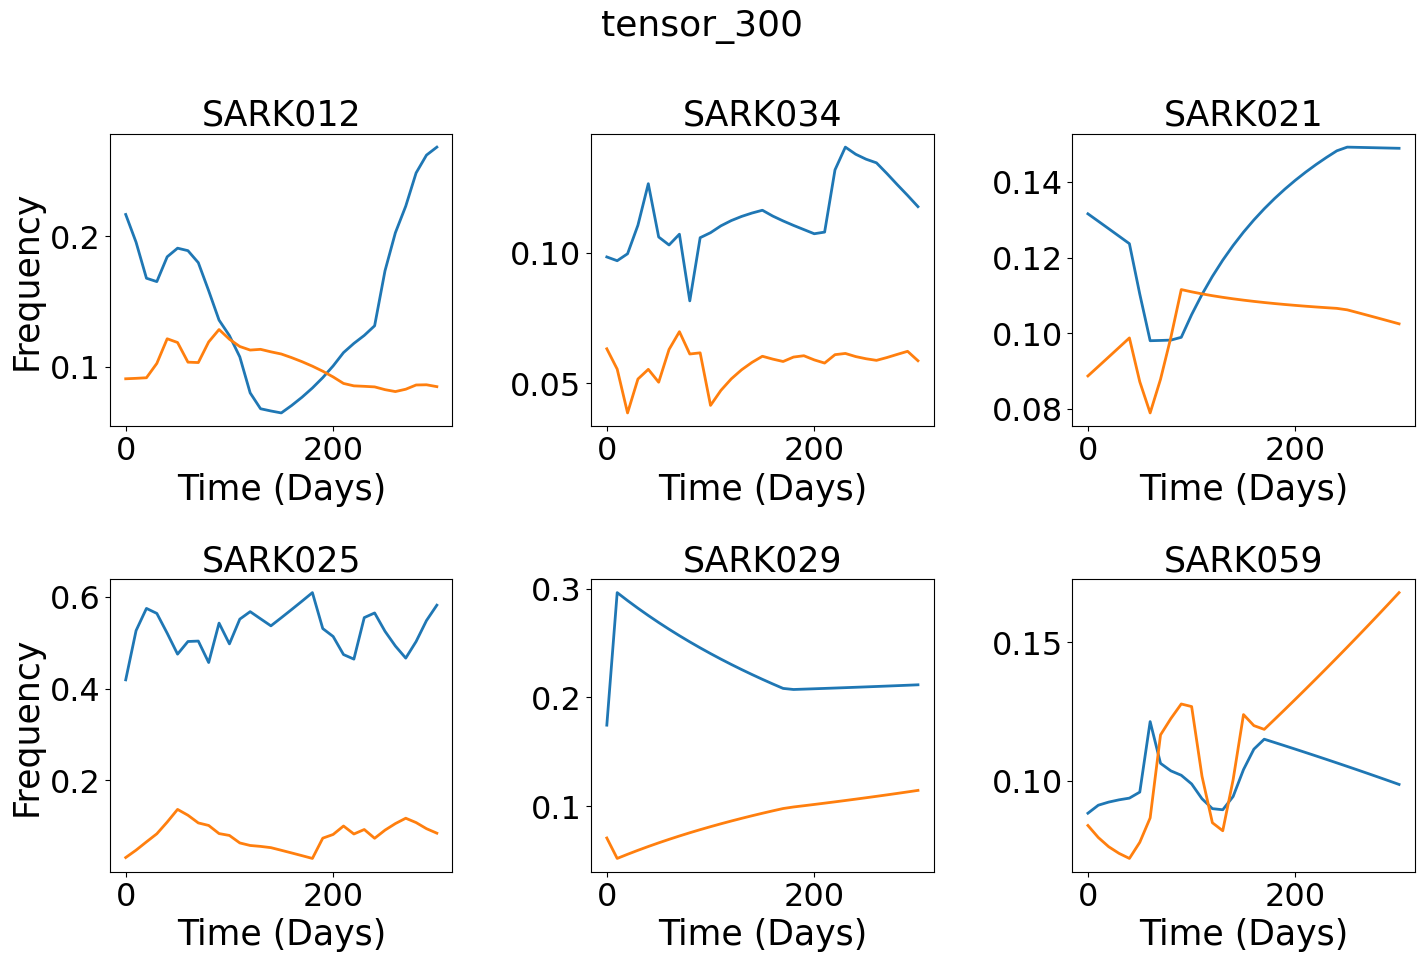

Processing tensor_200
Patient list for tensor_200: ['SARK012', 'SARK019', 'SARK034', 'SARK021', 'SARK025', 'SARK027', 'SARK029', 'SARK032', 'SARK059']


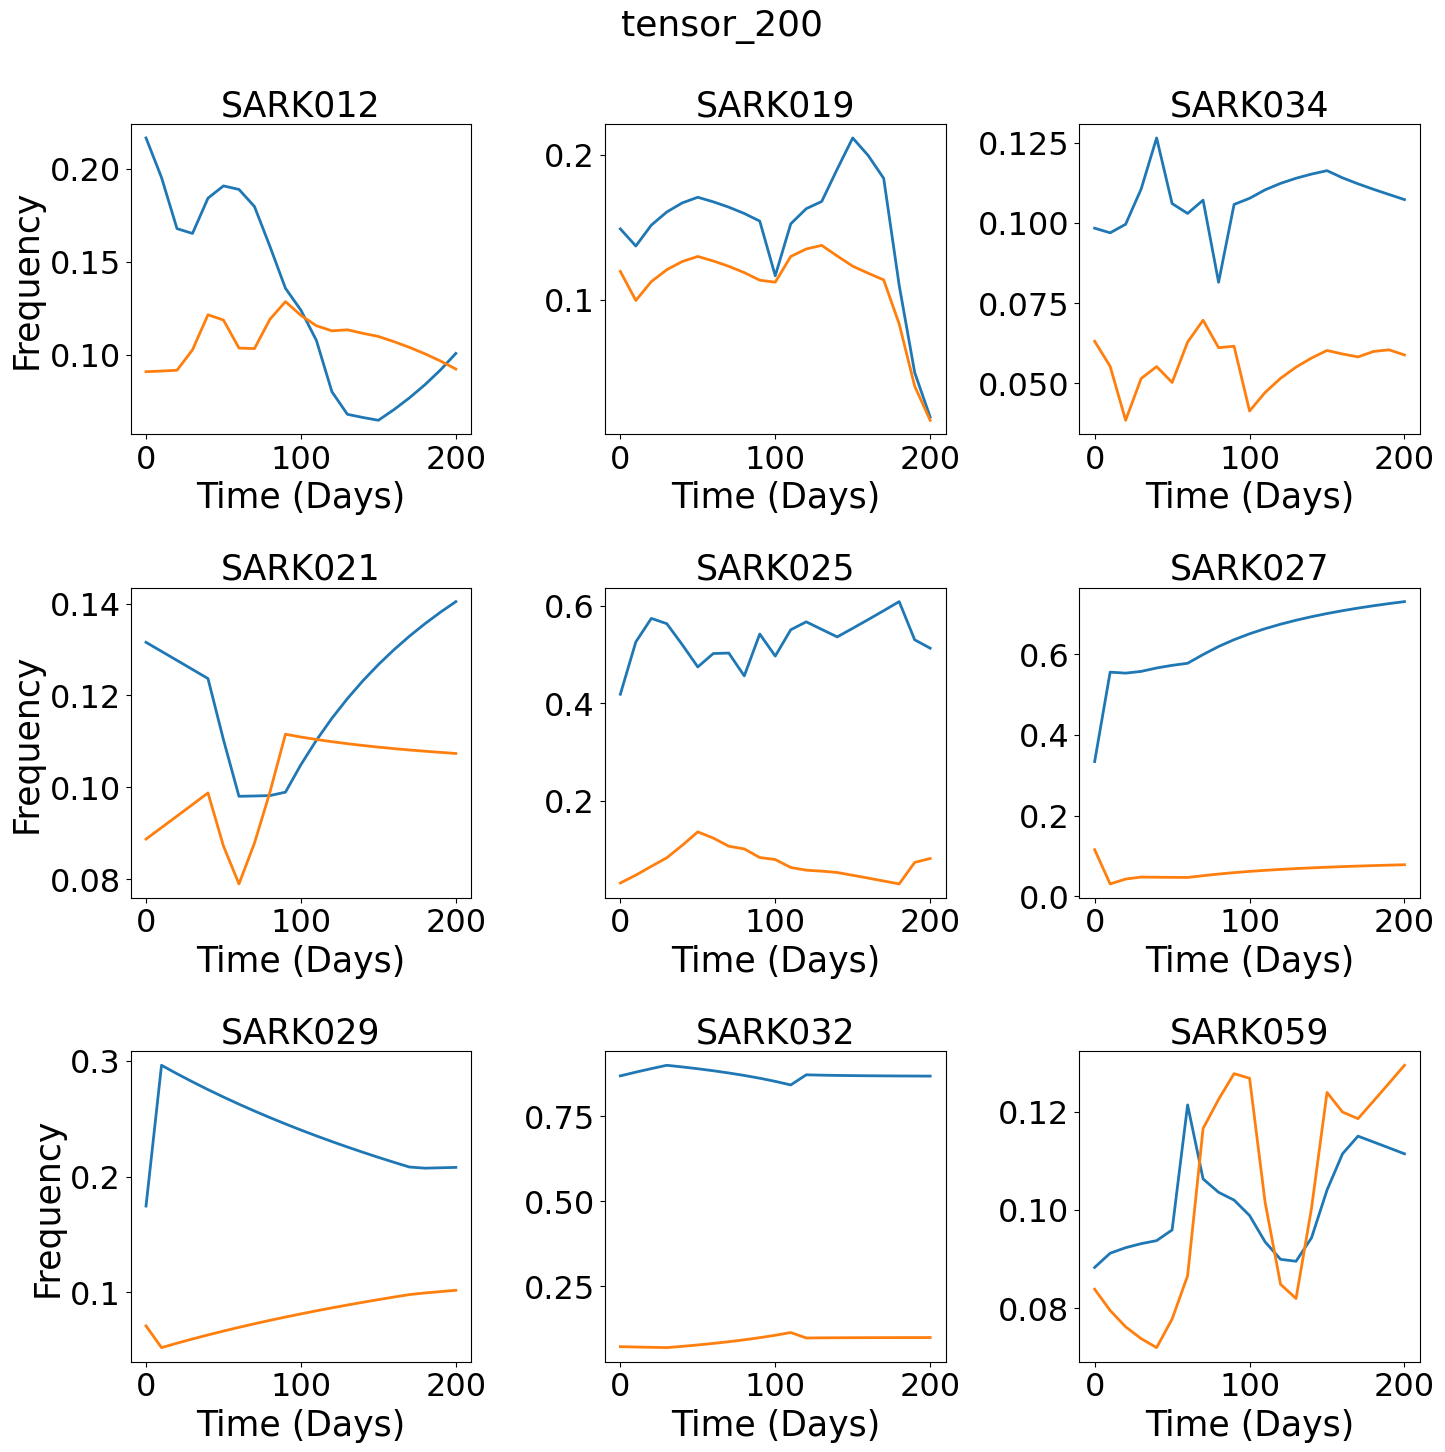

Processing tensor_100
Patient list for tensor_100: ['SARK012', 'SARK018', 'SARK019', 'SARK034', 'SARK021', 'SARK025', 'SARK027', 'SARK029', 'SARK032', 'SARK037', 'SARK059']


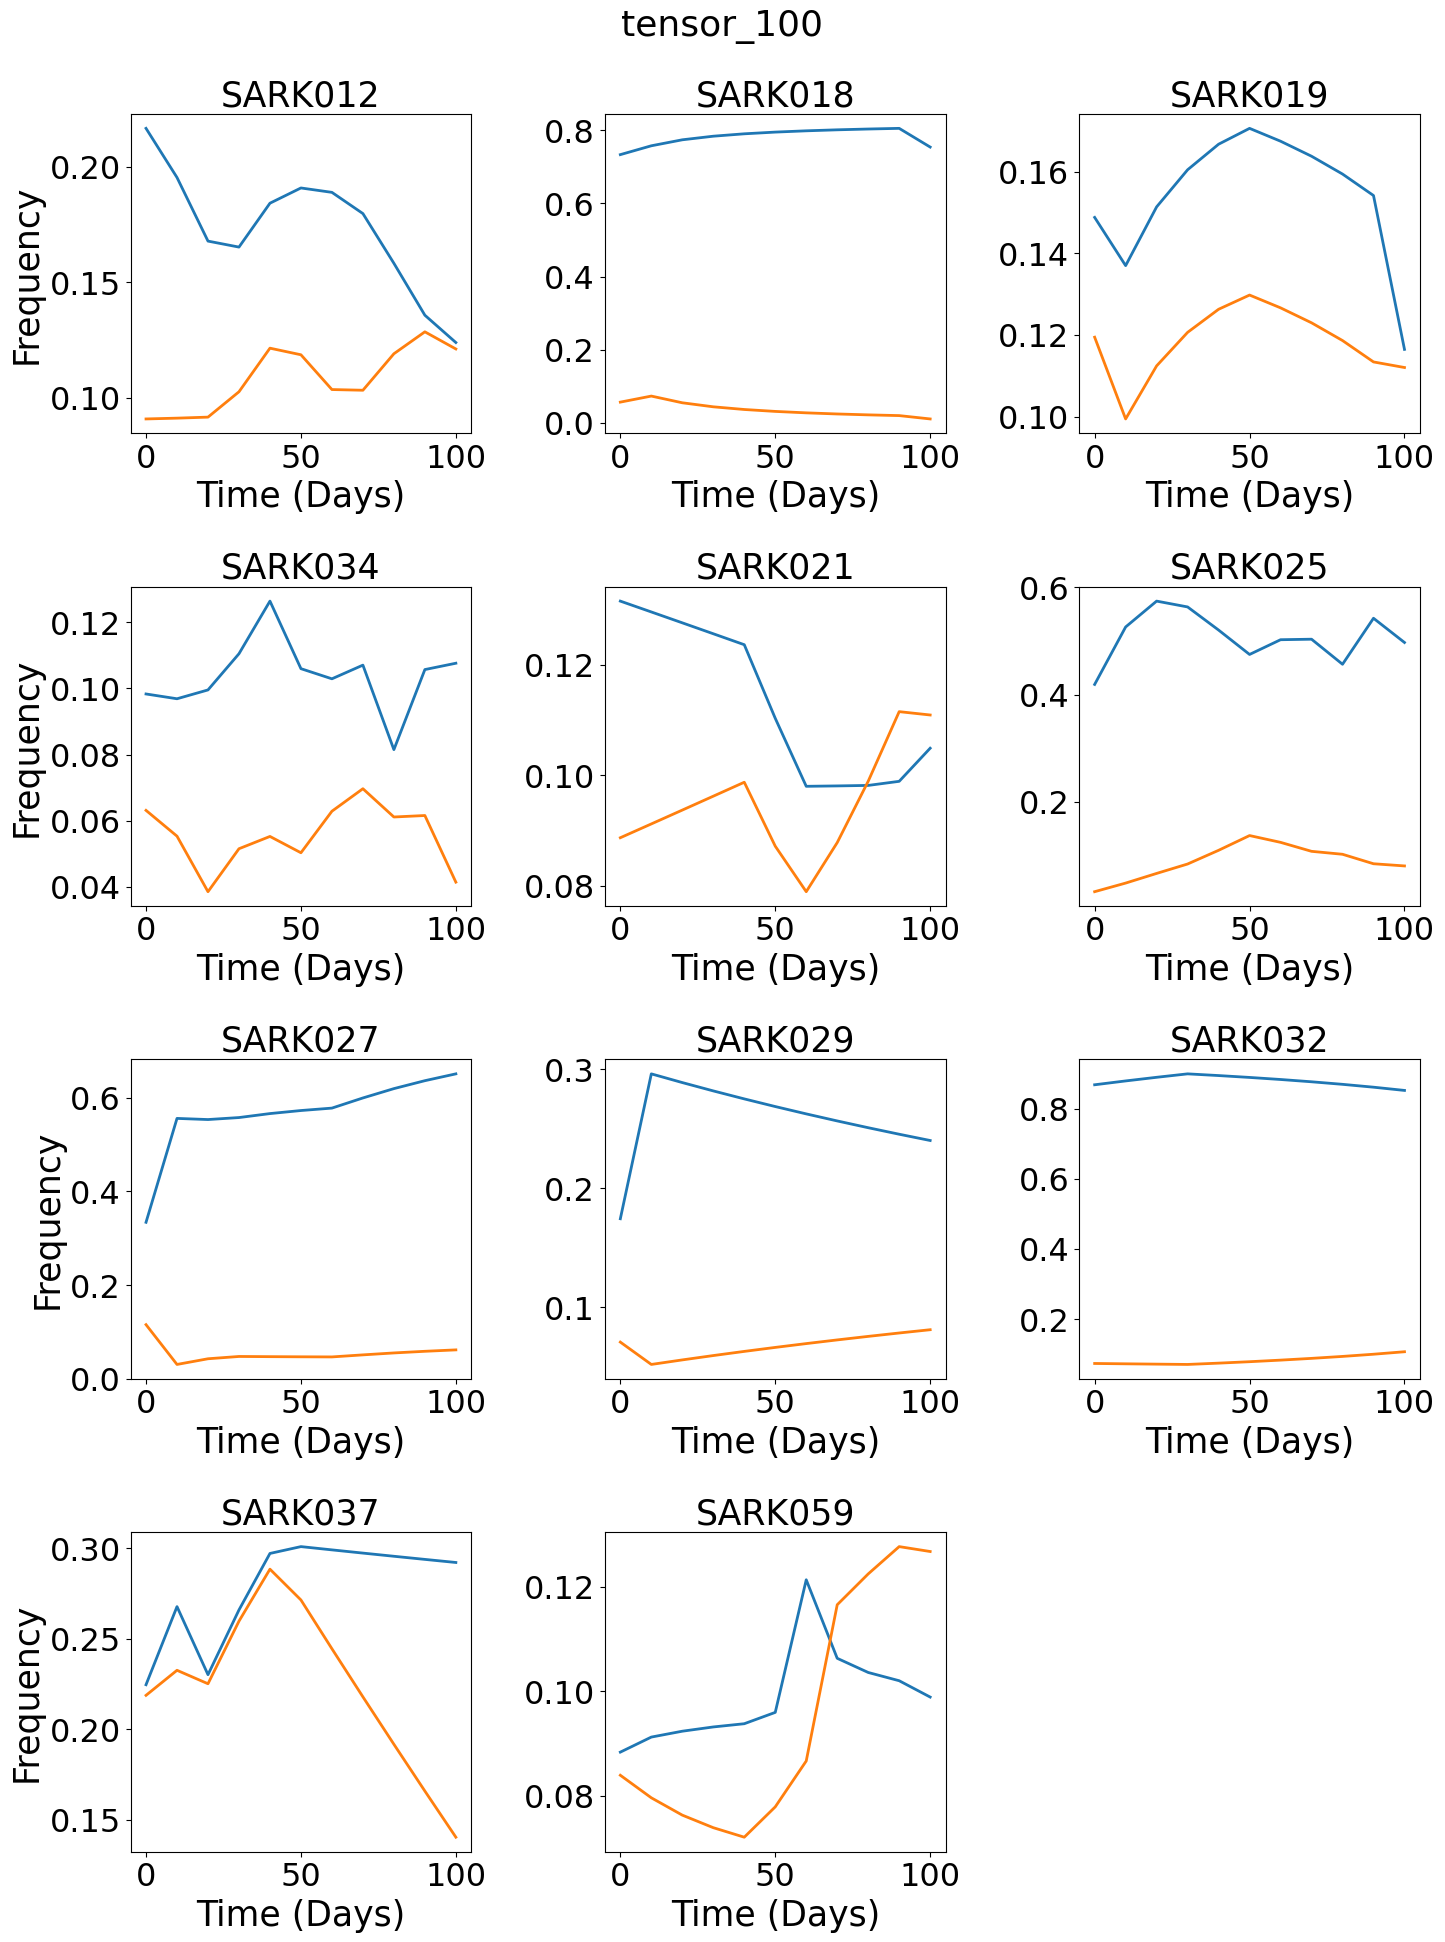

Processing tensor_70
Patient list for tensor_70: ['SARK012', 'SARK018', 'SARK019', 'SARK034', 'SARK021', 'SARK025', 'SARK041', 'SARK027', 'SARK029', 'SARK032', 'SARK033', 'SARK037', 'SARK059']


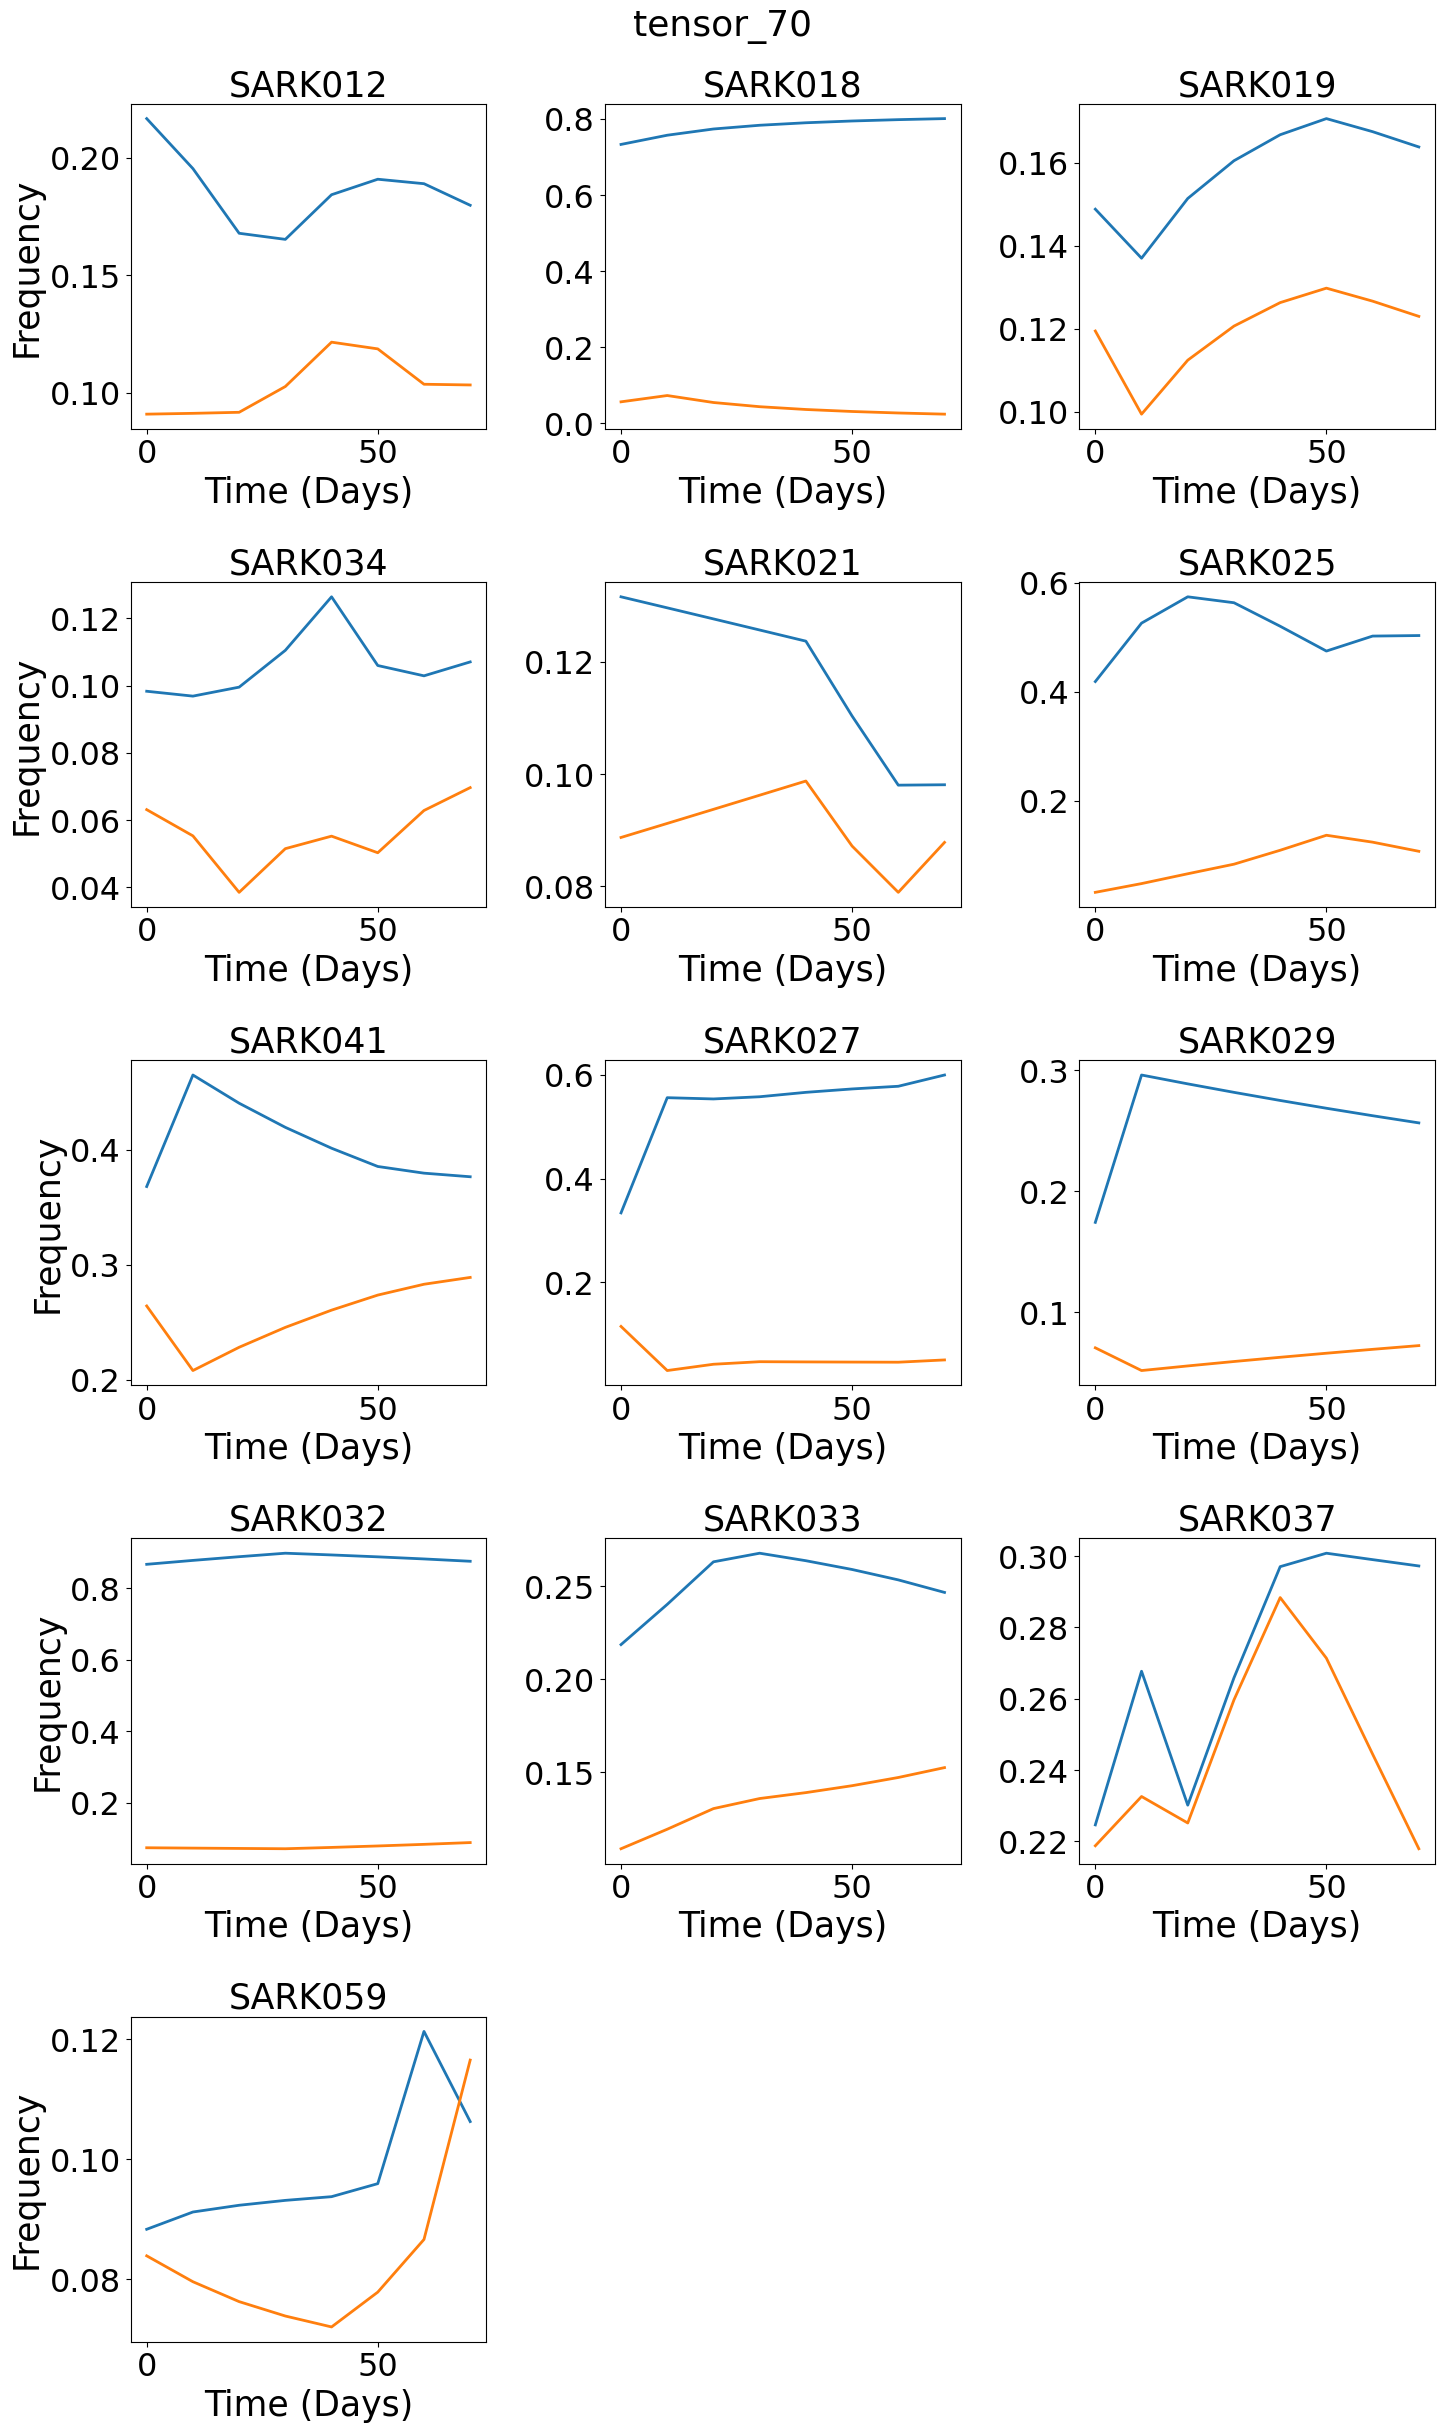

In [12]:

# Iterate over patient groups in descending order of available time
for time_group, tensor, pat_list_group, available_time_points in [
    (300, tensor_300, pat_list_300, [70, 100, 200, 300]),
    (200, tensor_200, pat_list_200, [70, 100, 200]),
    (100, tensor_100, pat_list_100, [70, 100]),
    (70, tensor_70, pat_list_70, [70])
]:
    print(f'Processing tensor_{time_group}')
    print(f'Patient list for tensor_{time_group}: {pat_list_group}')
    
    # Plot all patients in the current tensor group together
    plot_time_series_for_all_patients_in_tensor(tensor, pat_list_group, available_time_points, f"tensor_{time_group}",log_axis=False,specific_seq=[0,1])


# Tucker results

In [21]:
import pickle

# Load the tucker_results dictionary
with open("tucker_decompositions.pkl", "rb") as f:
    tucker_results = pickle.load(f)

print(" tucker_results loaded successfully")

 tucker_results loaded successfully


In [6]:
# Set global font sizes
plt.rcParams.update({
    "font.size": 15,       # Default text size
    "axes.titlesize": 17,  # Title size
    "axes.labelsize": 15,  # X and Y label size
    "xtick.labelsize": 12, # X tick labels
    "ytick.labelsize": 13, # Y tick labels
    "legend.fontsize": 13  # Legend text size
})

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MaxNLocator

def plot_factor_matrix_timeseries(factor_matrix, y_label=None, x_label='Time (Days)', title="Factor Matrix Timeseries", step=10, max_ticks=10,folder_name=None):
    """
    Plots the factor matrix as multiple time series, one per rank.

    Parameters:
    - factor_matrix (np.array): The factor matrix (time x ranks).
    - y_label (str): Label for y-axis (optional).
    - x_label (str): Label for x-axis.
    - title (str): Title of the plot.
    - step (int): Step size between time steps.
    - max_ticks (int): Maximum number of x-axis ticks to show (to avoid overlap).
    """
    ranks = factor_matrix.shape[1]
    fig, ax = plt.subplots(ranks, 1, figsize=(10, 2 * ranks), sharex=True)

    time_steps = np.arange(0, factor_matrix.shape[0] * step, step)

    if ranks == 1:
        ax = [ax]  # Make iterable

    for i in range(ranks):
        ax[i].plot(time_steps, factor_matrix[:, i])
        ax[i].set_ylabel(f'Comp. {i+1}')
        ax[i].tick_params(axis='y')
        ax[i].set_xlim(time_steps[0], time_steps[-1])

    # Set x-axis ticks and labels on the last plot
    ax[-1].set_xlabel(x_label)
    ax[-1].tick_params(axis='x')

    # Set ticks every 10 days
    ax[-1].set_xticks(time_steps)

    # Show labels only on every Nth tick to avoid overlap
    label_every = max(1, len(time_steps) // max_ticks)
    xtick_labels = [str(t) if i % label_every == 0 else "" for i, t in enumerate(time_steps)]
    ax[-1].set_xticklabels(xtick_labels)

    # Title and spacing
    # plt.suptitle(title)
    plt.tight_layout(rect=[0, 0, 1, 0.95])

    # Save with safe filename
    save_title = title.replace(" ", "_").replace("|", "").replace("(", "").replace(")", "").replace(",", "")
    plt.savefig(f"{folder_name}{save_title}.png", format="png", bbox_inches="tight")
    plt.savefig(f"{folder_name}{save_title}.pdf", format="pdf", bbox_inches="tight")
    plt.show()


In [8]:
# Core matrix - find most relevant
from itertools import product
def most_relevant(core_tensor):
    # Convert core tensor to a DataFrame with meaningful statistics
    core_tensor_df = pd.DataFrame({
        "Index": list(product(*[np.arange(1, si+1) for si in core_tensor.shape])),  # Tuple index
        "Weight": core_tensor.flatten(),  # Raw core tensor values
        "Fraction": core_tensor.flatten()**2,  # Energy contribution
        "Sign": np.sign(core_tensor.flatten())  # Positive or negative value
    })

    # # Normalize Fraction to sum to 1 (percentage of importance)
    # core_tensor_df["Fraction"] /= core_tensor_df["Fraction"].sum()

    # # Convert index tuples to string for better visualization
    # core_tensor_df["Index"] = core_tensor_df["Index"].astype(str)

    # # Sort by Fraction (importance) in descending order
    # core_tensor_df = core_tensor_df.sort_values("Fraction", ascending=False)
    core_tensor_df = core_tensor_df.sort_values("Fraction", ascending=False)
    core_tensor_df["Index"] = core_tensor_df["Index"].astype(str)
    core_tensor_df["Fraction"] = core_tensor_df["Fraction"] / np.sum(core_tensor_df["Fraction"])

    return core_tensor_df 

In [9]:
def barplot_core(core_tensor, title,folder_name):
    fig = plt.figure(figsize=(10,2))
    # sns.barplot(core_tensor.iloc[:8, :], x="Index", y="Fraction", legend=False)
    sns.barplot(core_tensor.iloc[:10, :], x="Index", y="Fraction", hue="Sign", palette=["#2369BD", "#A9393C"], legend=True)
    # plt.title(title)
    save_title = title.replace(" ", "_").replace("|", "").replace("(", "").replace(")", "").replace(",", "")
    plt.savefig(f"{folder_name}{save_title}.png", format="png", bbox_inches="tight")
    plt.savefig(f"{folder_name}{save_title}.pdf", format="pdf", bbox_inches="tight")
    plt.show() 
   

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def plot_rotated_heatmap_with_barplots(factor_matrix, column_labels=None, row_labels=None, y_label=None, x_label=None, title="Rotated Factor Matrix Heatmap", sequences_only=False,folder_name=None):
    """
    Plots a heatmap rotated 90 degrees to the right with small barplots for each rank on the right.
    Bars are colored based on sign: red for positive, blue for negative.
    Heatmap is centered at 0.
    """
    factor_matrix = np.array(factor_matrix).T  # Rotate 90 degrees to the right
    ranks, sequences = factor_matrix.shape  # Update shape post-transposition

    # Determine max absolute value to center colormap
    max_abs_val = np.abs(factor_matrix).max()

    fig = plt.figure(figsize=(10, 2*ranks))
    # plt.suptitle(title)

    # Define subplot grid
    ax_heatmap = plt.subplot2grid(shape=(ranks, 4), loc=(0, 0), rowspan=ranks, colspan=3)
    ax_barplots = [plt.subplot2grid(shape=(ranks, 4), loc=(i, 3), rowspan=1, colspan=1) for i in range(ranks)]

    # Heatmap centered at 0
    sns.heatmap(
        factor_matrix,
        cmap="coolwarm",
        center=0,
        vmin=-max_abs_val,
        vmax= max_abs_val,
        cbar=True,
        linewidths=0.5,
        ax=ax_heatmap
    )
    ax_heatmap.set_xlabel(x_label)
    ax_heatmap.set_ylabel(y_label)

    if column_labels:
        if sequences_only:
            ax_heatmap.set_xticks(np.arange(0, len(column_labels), 5) + 0.5)
            ax_heatmap.set_xticklabels([column_labels[i] for i in range(0, len(column_labels), 5)], rotation=0)
        else:
            ax_heatmap.set_xticks(np.arange(len(column_labels)) + 0.5)
            ax_heatmap.set_xticklabels(column_labels, rotation=45)
    else:
        ax_heatmap.set_xticks([])

    if row_labels:
        ax_heatmap.set_yticks(np.arange(len(row_labels)) + 0.5)
        ax_heatmap.set_yticklabels(row_labels, rotation=90)
    else:
        ax_heatmap.set_yticks([])

    # min_height = 1  # Minimum visible height for bar plots

    # Barplots with color based on sign and min height
    for i, ax_bar in enumerate(ax_barplots):
        values = factor_matrix[i, :]
        indices = np.arange(sequences)

        pos_mask = values >= 0
        neg_mask = values < 0

        ax_bar.bar(indices[pos_mask], values[pos_mask], color="red")
        ax_bar.bar(indices[neg_mask], values[neg_mask], color="blue")

        max_val = max(abs(values.max()), abs(values.min()))
        # ax_bar.set_ylim(-max(min_height, max_val), max(min_height, max_val))
        if sequences_only:
            ax_bar.set_xlim([-3, sequences + 3])
        else:
            ax_bar.set_xlim([-1, sequences + 1])

        ax_bar.set_xlabel(x_label)
        ax_bar.set_ylabel("Value")
        # if column_labels:
        #     if sequences_only:
        #         ax_bar.set_xticks(np.arange(0, len(column_labels), 5) + 0.5)
        #         ax_bar.set_xticklabels([column_labels[i] for i in range(0, len(column_labels), 5)], rotation=0)
        #     else:
        #         ax_bar.set_xticks(np.arange(len(column_labels)) + 0.5)
        #         ax_bar.set_xticklabels(column_labels, rotation=45)
        # else:
        #     ax_bar.set_xticks([])

    plt.tight_layout()
    save_title = title.replace(" ", "_").replace("|", "").replace("(", "").replace(")", "").replace(",", "")
    plt.savefig(f"{folder_name}{save_title}.png", format="png", bbox_inches="tight")
    plt.savefig(f"{folder_name}{save_title}.pdf", format="pdf", bbox_inches="tight")
    plt.show()


In [11]:
def decomp_visualizations(td_dic, t_name, pat_list, method):
    core = td_dic['core_tensor']
    factors = td_dic['factor_matrices']
    Us, Ut, Up = factors
    folder_name=f"C:/AQUI ESTA LO WENO/UNI/Chalmers/TFM/Figures/tucker_results/{t_name}/"

    # Us heatmap
    column_labels = [f"Comp. {i+1}" for i in range(Us.shape[1])]
    row_labels = [f"{i}" for i in range(Us.shape[0])]
    y_label = 'Sequences'
    plot_rotated_heatmap_with_barplots(
        Us,
        column_labels=row_labels,
        row_labels=column_labels,
        y_label=None,
        x_label=y_label,
        title=f"{method} | Us for {t_name}",
        sequences_only=True,
        folder_name=folder_name
    )

    # Ut time series
    plot_factor_matrix_timeseries(Ut, 
                                  title=f"{method} | Ut for {t_name}",folder_name=folder_name
                                  )

    # Up heatmap
    y_label = 'Patients'
    column_labels = [f"Comp. {i+1}" for i in range(Up.shape[1])]
    row_labels = [f"{pat_list[i]}" for i in range(Up.shape[0])]
    plot_rotated_heatmap_with_barplots(
        Up,
        column_labels=row_labels,
        row_labels=column_labels,
        y_label=None,
        x_label=y_label,
        title=f"{method} | Up for {t_name}",
        sequences_only=False,
        folder_name=folder_name
    )

    # Core tensor most relevant indices
    core_tensor_df = most_relevant(core)
    barplot_core(core_tensor_df, 
                 title=f"{method} | Core indices for {t_name}",folder_name=folder_name
                 )


In [12]:
def plot_all_rank_decompositions(tensor_name, type_name, tucker_results, pat_list):
    """
    Plots all available rank decompositions for a given tensor and type.

    Parameters:
    - tensor_name (str): e.g., "tensor_70"
    - type_name (str): e.g., "cent", "log", or "Normal"
    - tucker_results (dict): Dict of results indexed by rank tuples,
                             each value is a dict with keys like "cent_tensor_70"
    - pat_list (list): Patient labels
    """
    full_tensor_key = f"{type_name}_{tensor_name}"
    print(f"\n Checking decompositions for: {full_tensor_key}")

    matching_ranks = []
    for ranks, data in tucker_results.items():
        if full_tensor_key in data:
            matching_ranks.append(ranks)
            print(f"   Found rank {ranks}")

    if not matching_ranks:
        raise ValueError(f"ERROR: {full_tensor_key} not found in any decompositions!")

    for ranks in matching_ranks:
        print(f"\n Plotting {full_tensor_key} with ranks {ranks}")
        td_dic = tucker_results[ranks][full_tensor_key]

        # Validate patient dimension
        if td_dic["factor_matrices"][2].shape[0] != len(pat_list):
            print(f" Skipping due to mismatch in patient count: expected {len(pat_list)}, got {td_dic['factor_matrices'][2].shape[0]}")
            continue

        method_label = f"{ranks}"
        decomp_visualizations(td_dic, tensor_name, pat_list=pat_list, method=method_label)


## 70



 Checking decompositions for: cent_tensor_70
   Found rank (1, 2, 1)
   Found rank (4, 4, 7)
   Found rank (5, 2, 5)
   Found rank (15, 2, 5)
   Found rank (8, 3, 7)

 Plotting cent_tensor_70 with ranks (1, 2, 1)


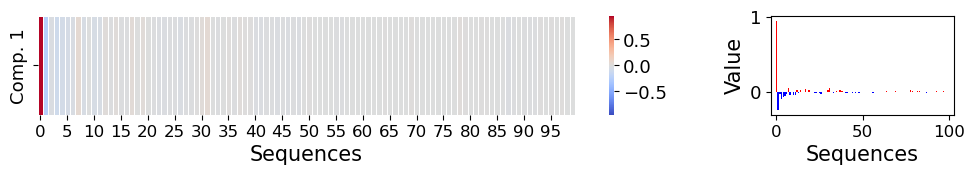

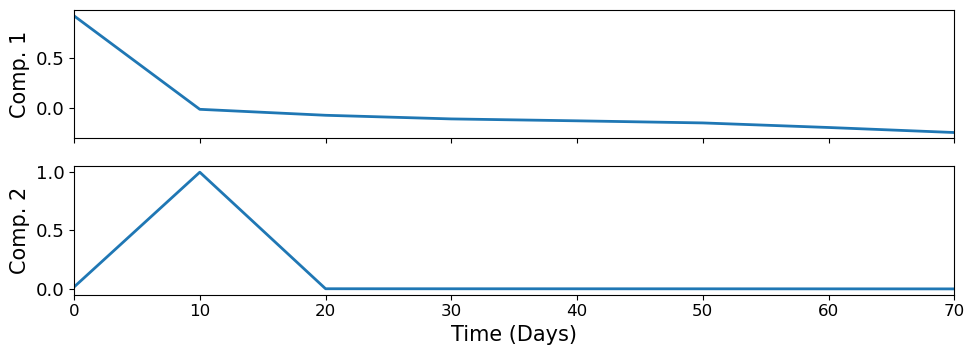

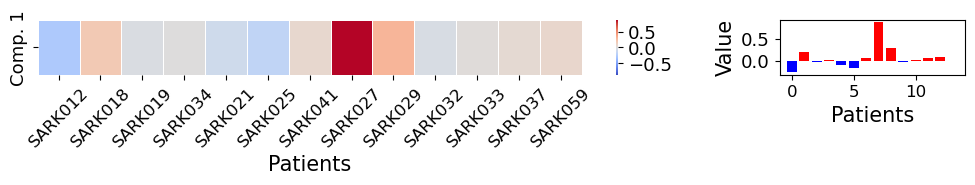

C:\Users\viola\AppData\Local\Temp\ipykernel_2356\1078991099.py:4: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.barplot(core_tensor.iloc[:10, :], x="Index", y="Weight", hue="Sign", palette=["#2369BD", "#A9393C"], legend=False)


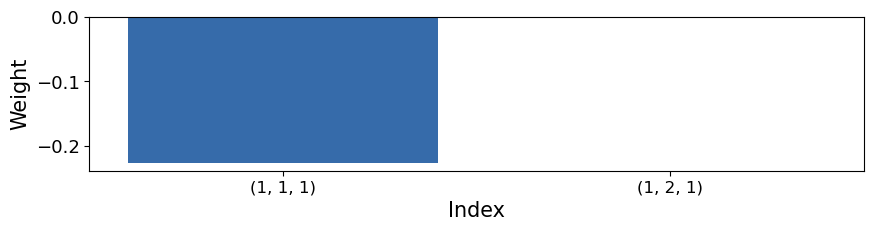


 Plotting cent_tensor_70 with ranks (4, 4, 7)


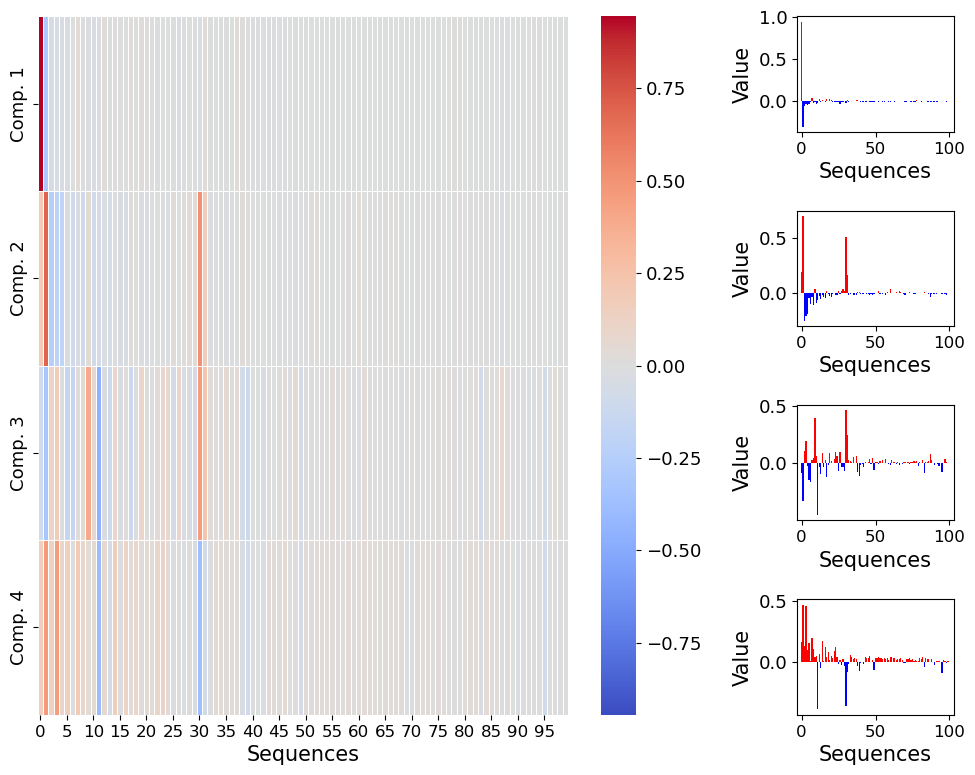

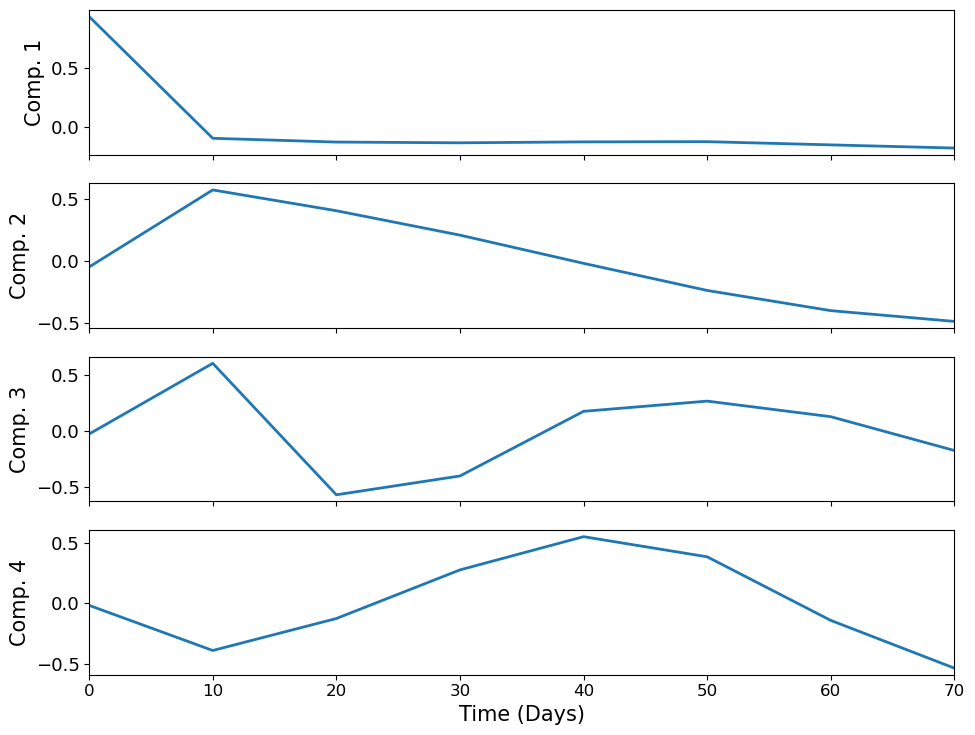

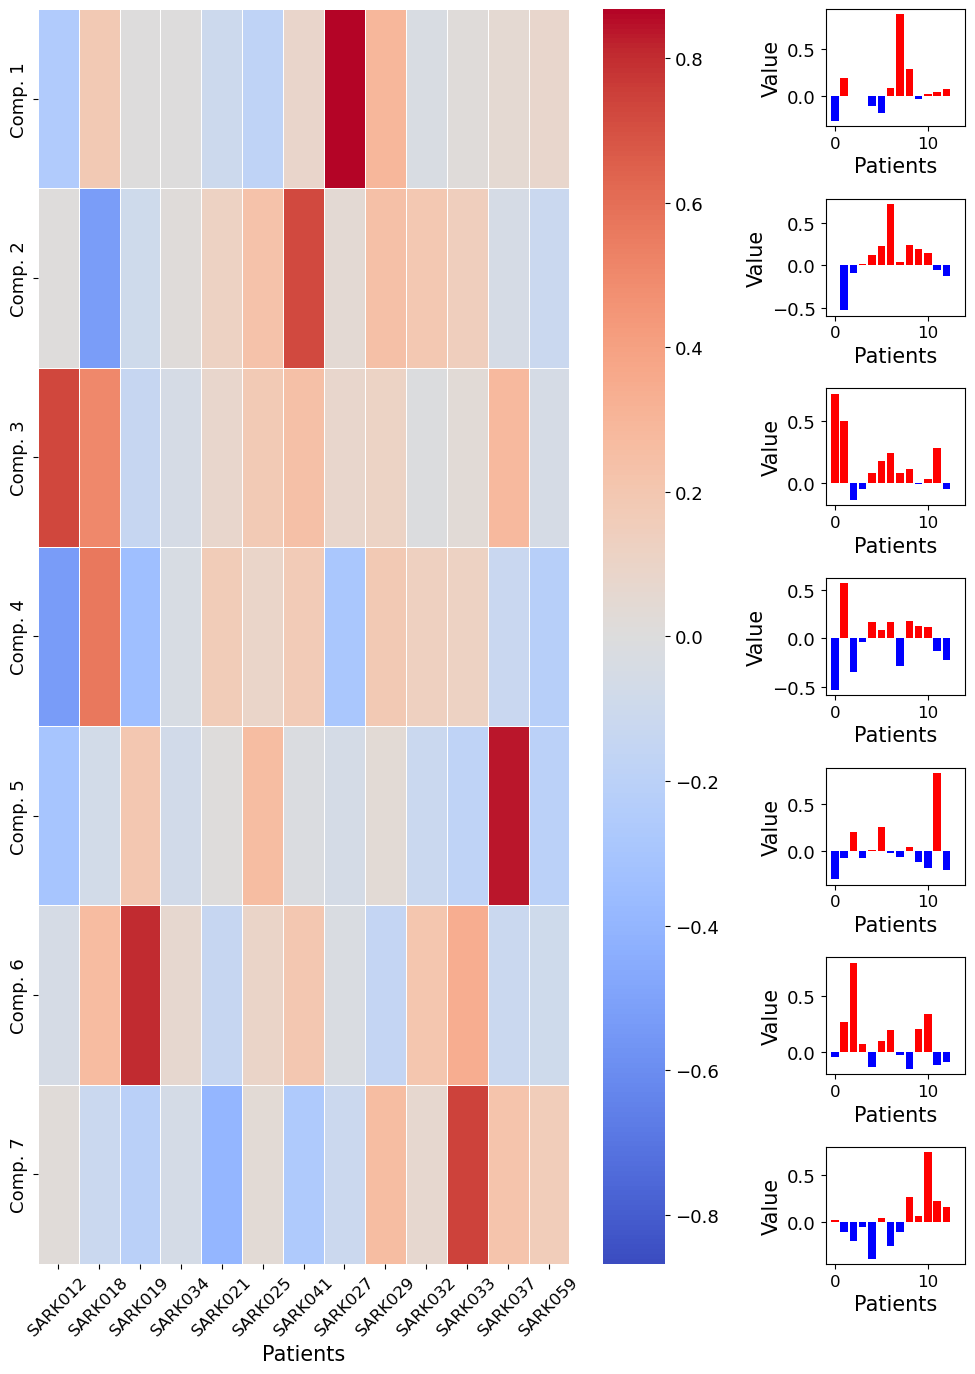

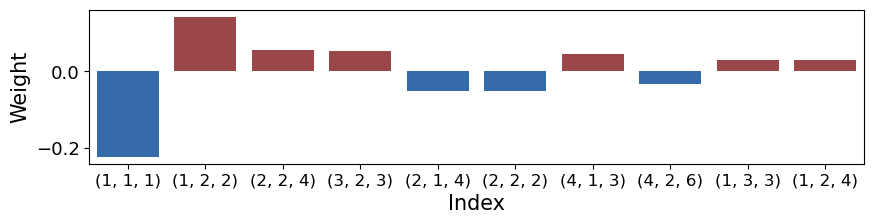


 Plotting cent_tensor_70 with ranks (5, 2, 5)


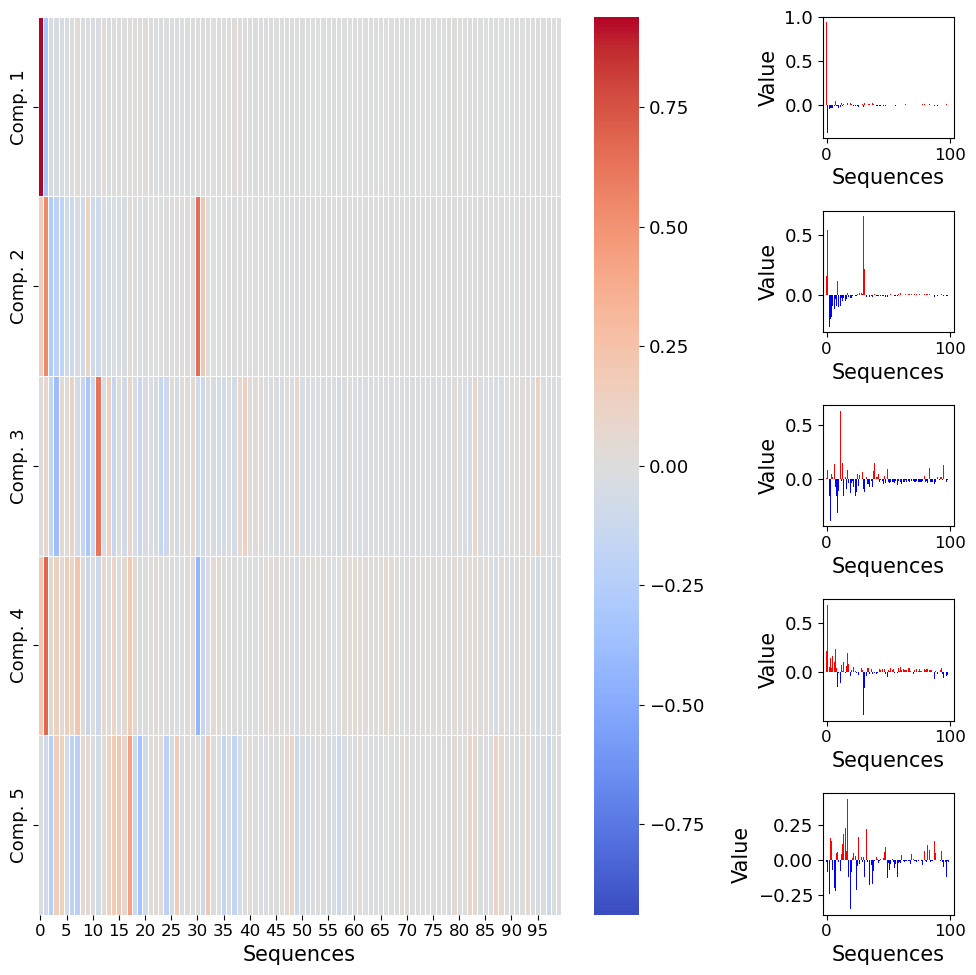

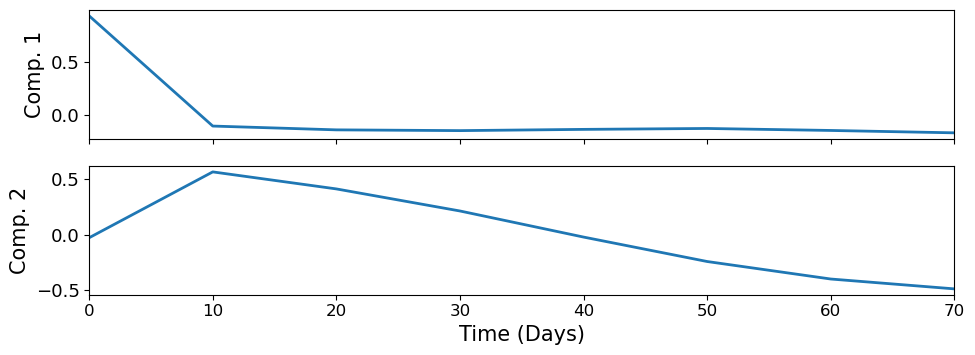

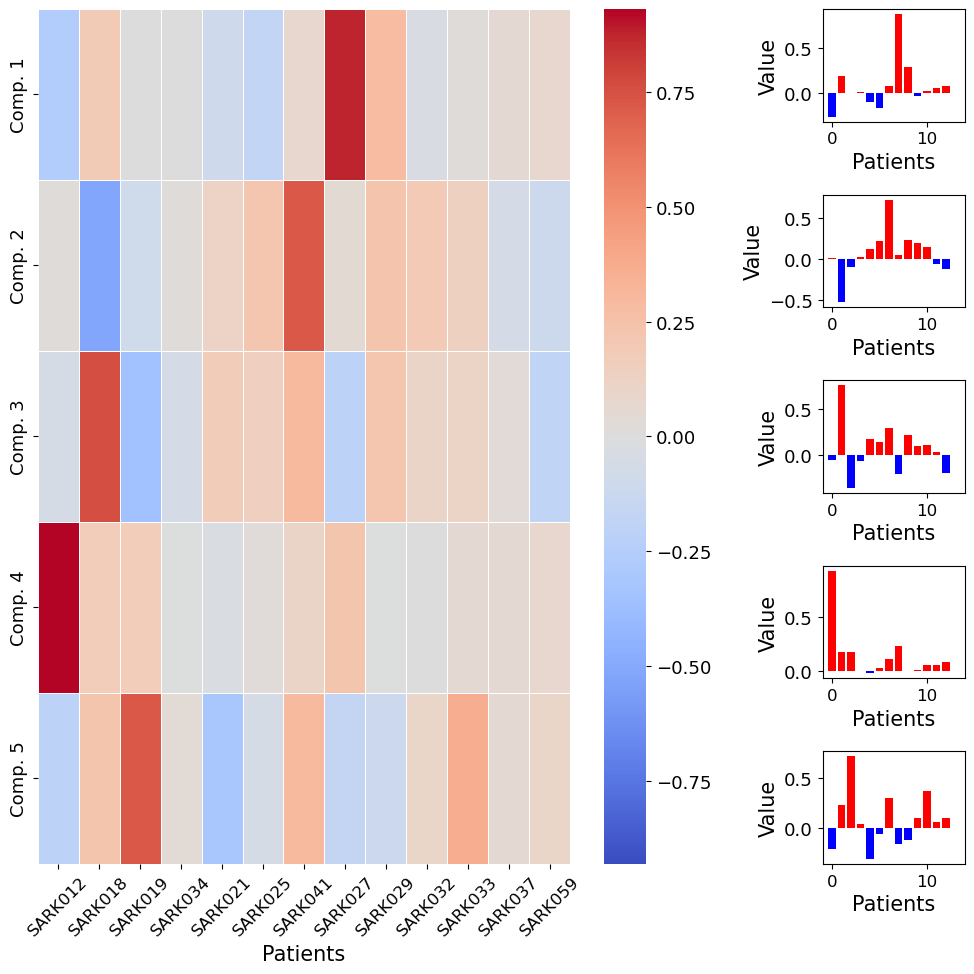

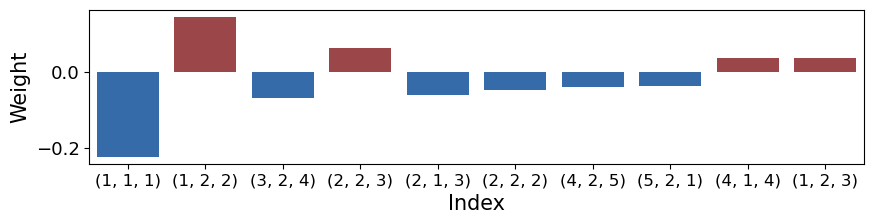


 Plotting cent_tensor_70 with ranks (15, 2, 5)


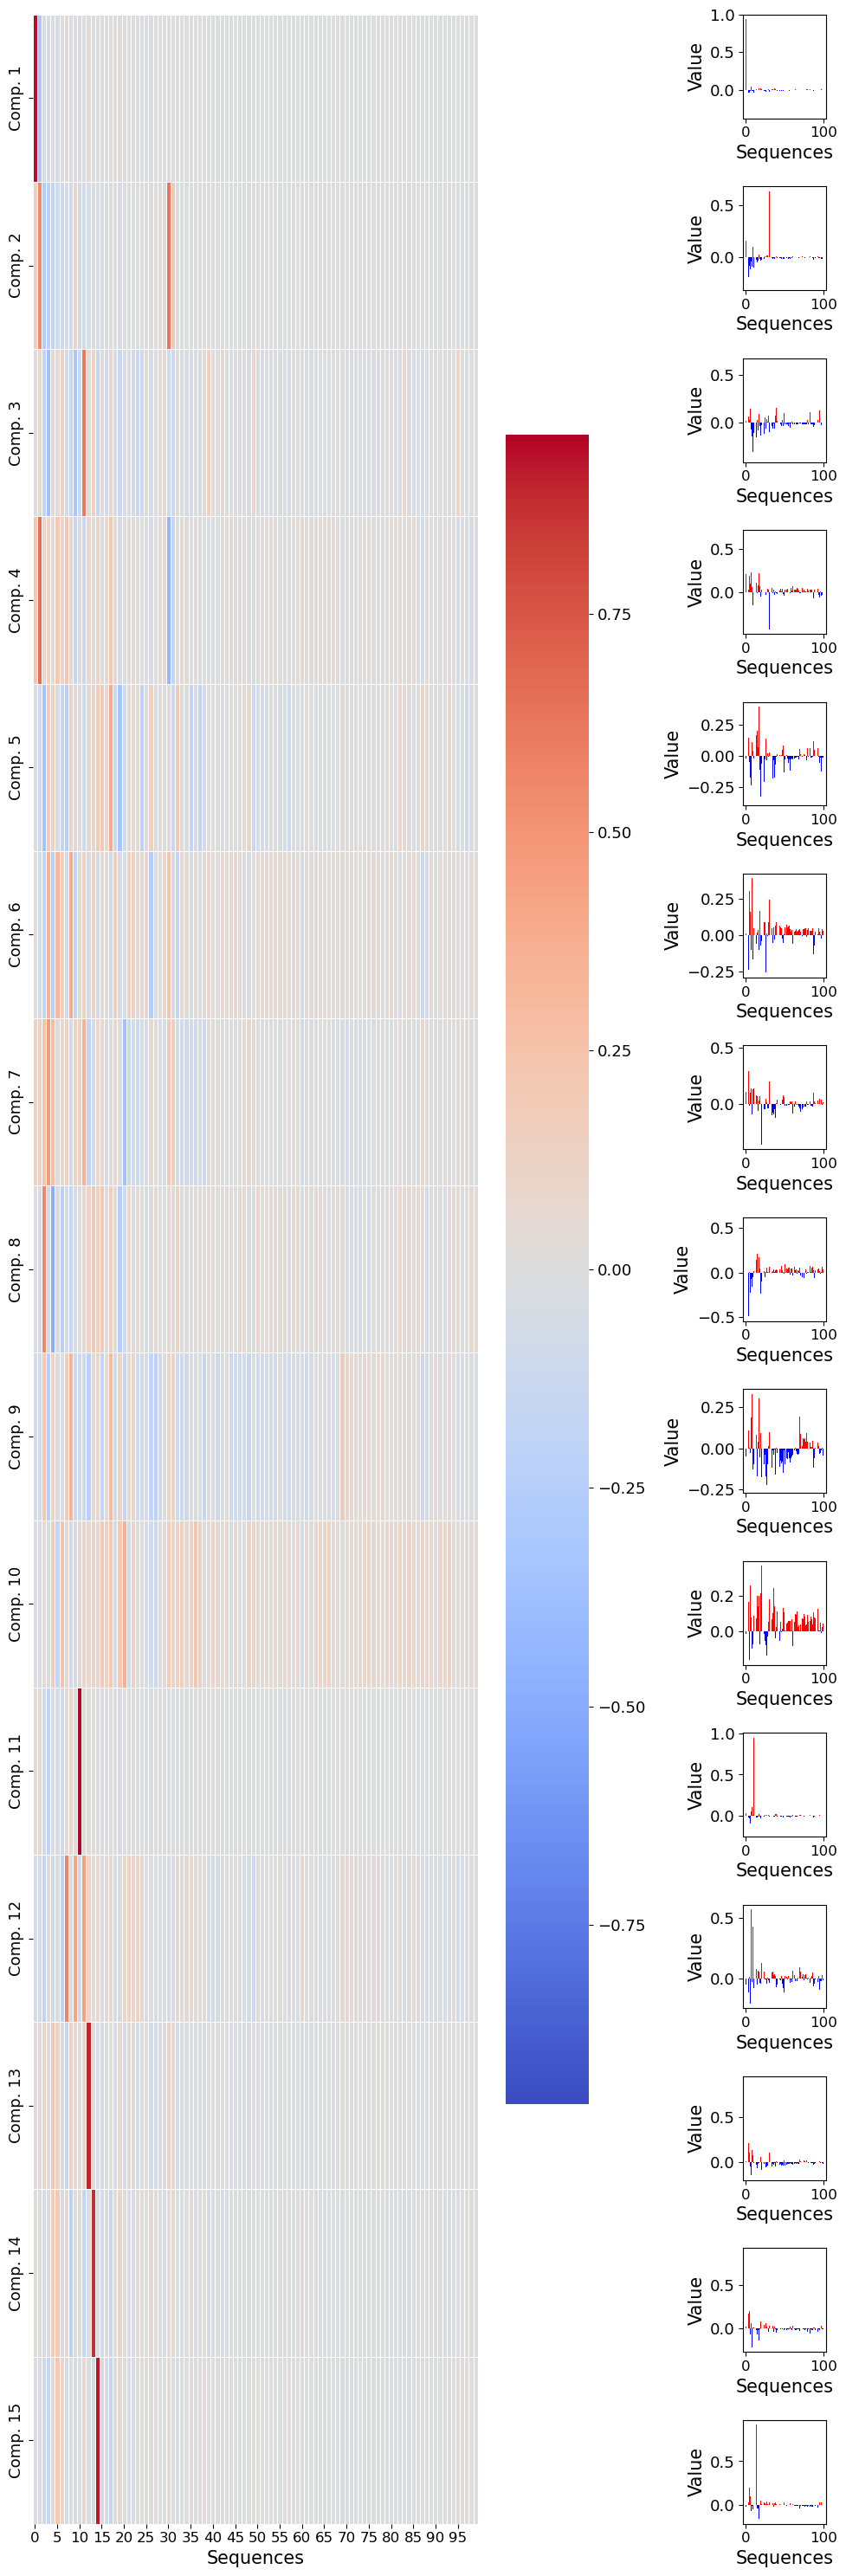

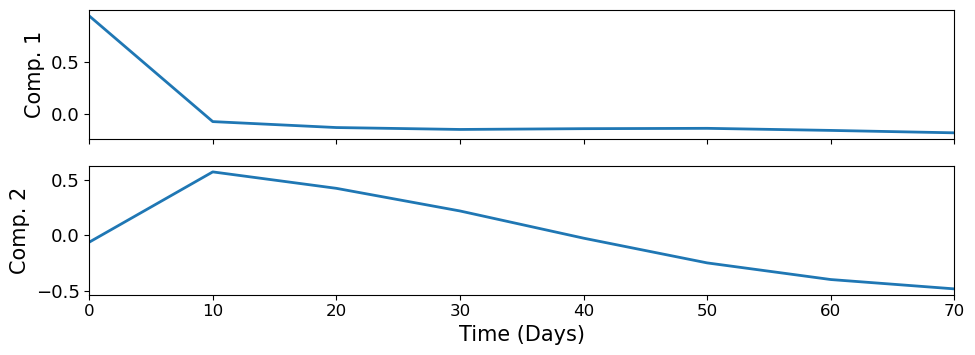

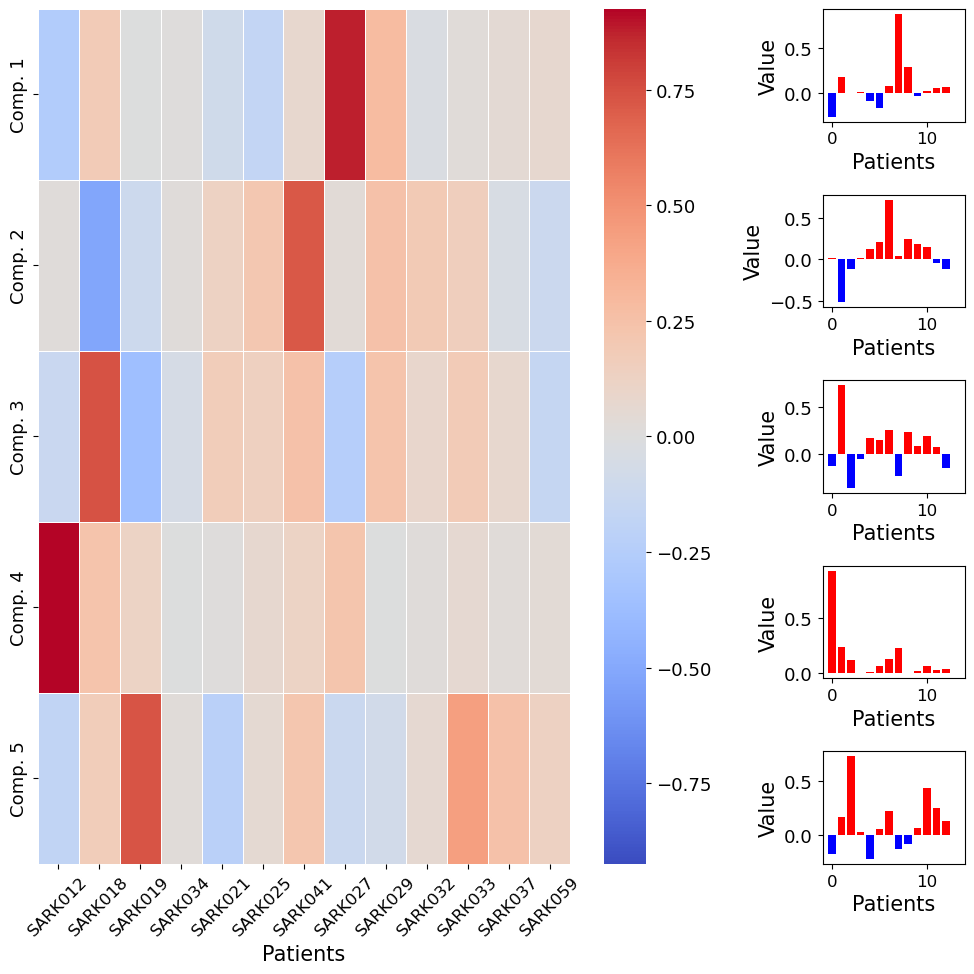

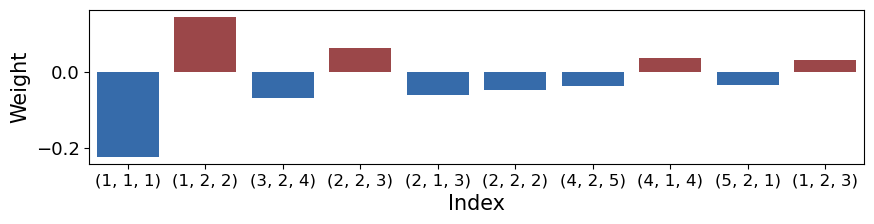


 Plotting cent_tensor_70 with ranks (8, 3, 7)


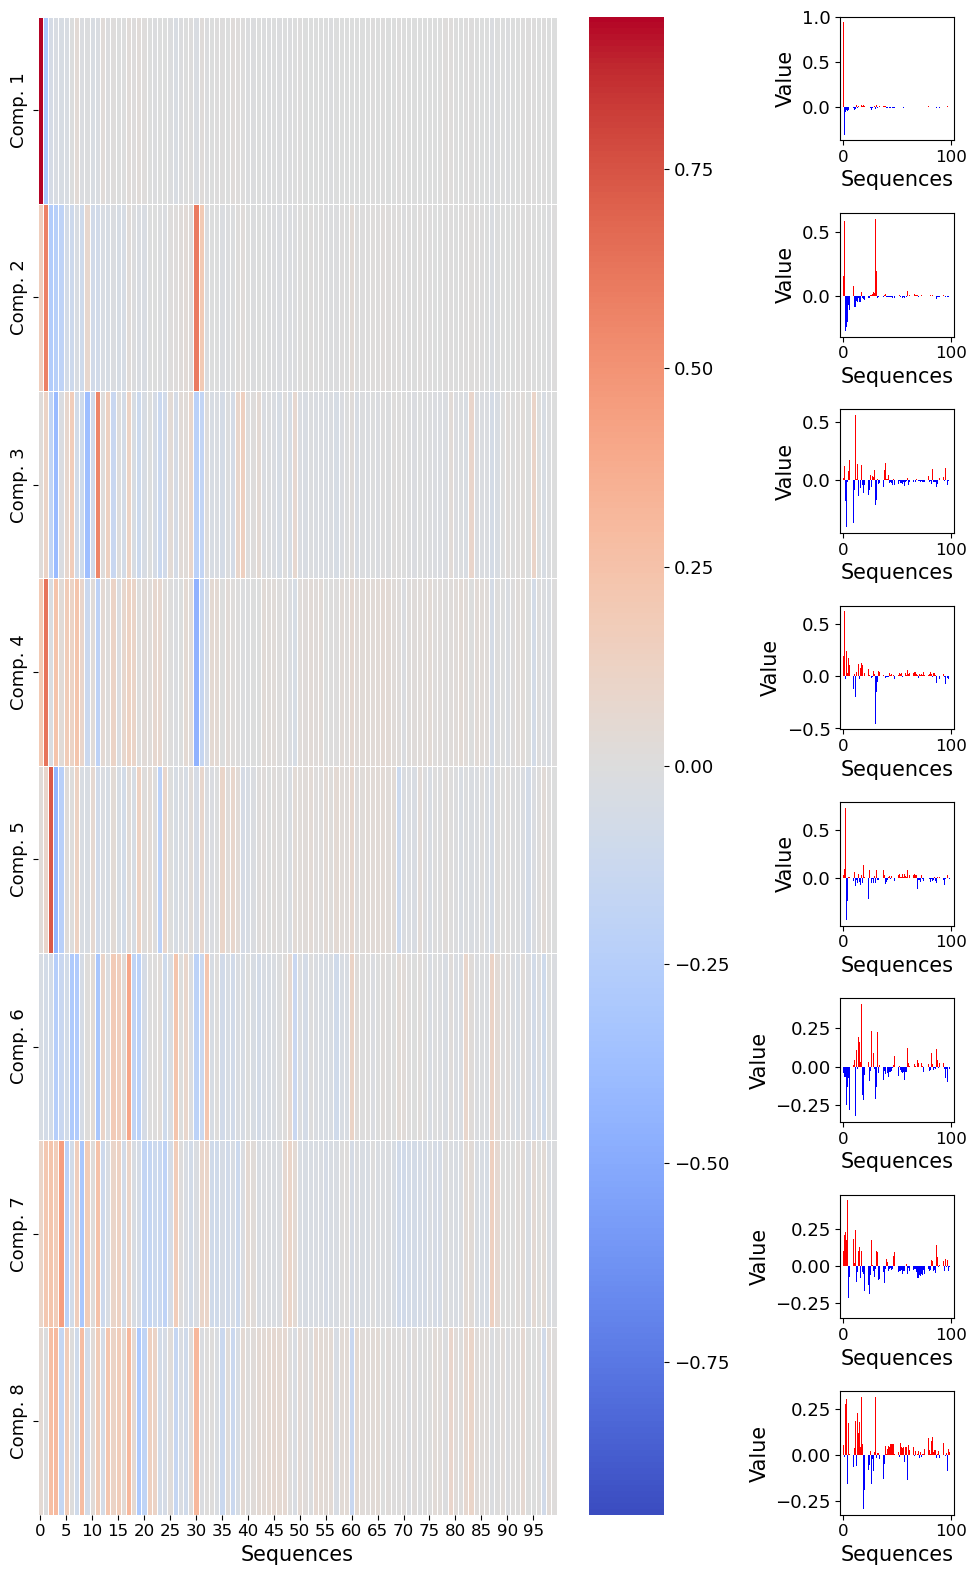

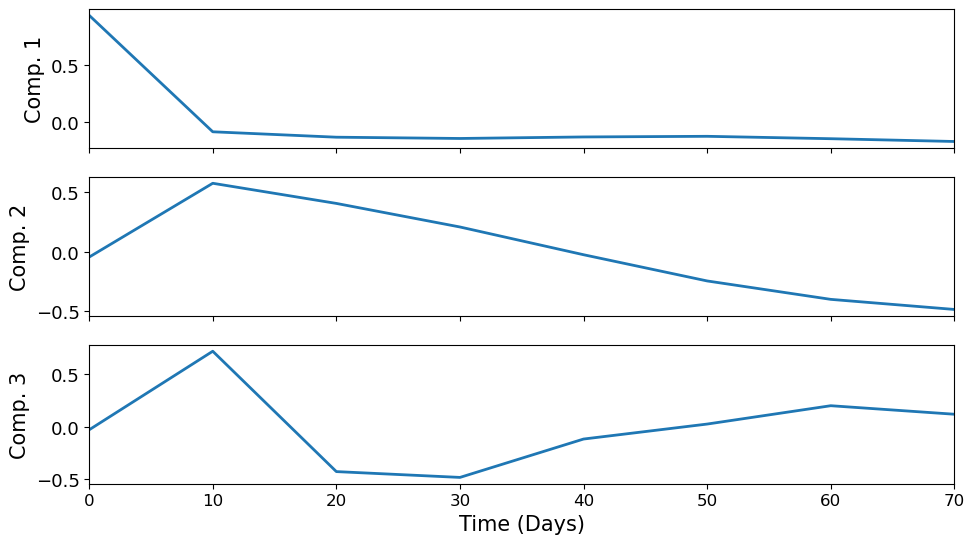

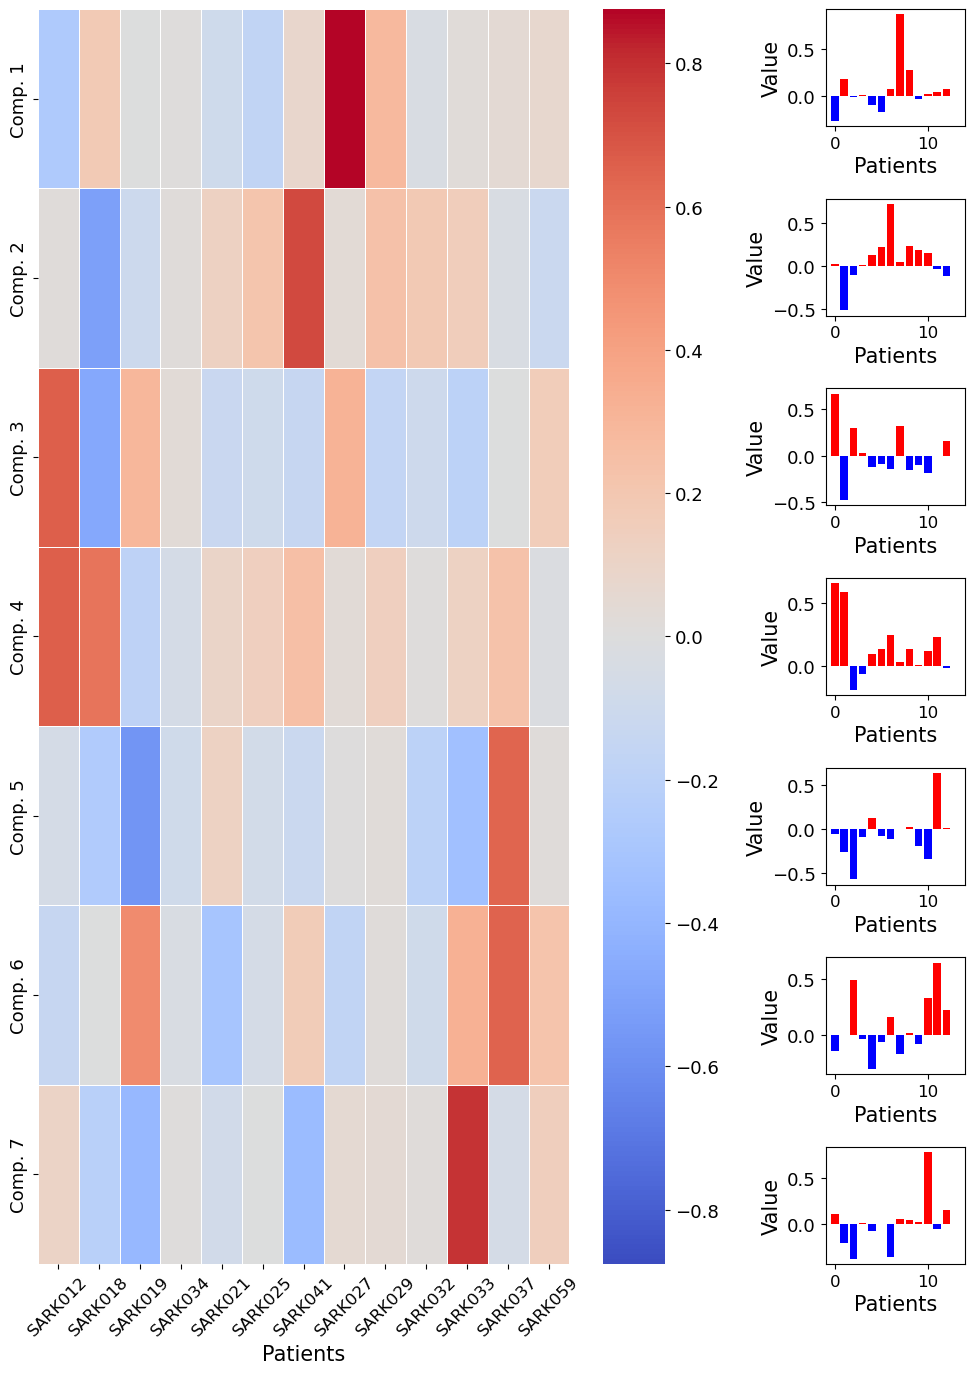

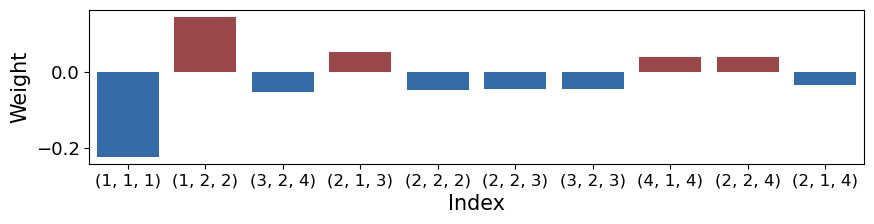

In [95]:
tensor_name = "tensor_70"
type_name = "cent" 
plot_all_rank_decompositions(tensor_name, type_name, tucker_results, pat_list_70)

## 100


 Checking decompositions for: cent_tensor_100
   Found rank (2, 2, 3)
   Found rank (5, 4, 6)
   Found rank (5, 3, 5)
   Found rank (15, 3, 5)
   Found rank (8, 4, 6)

 Plotting cent_tensor_100 with ranks (2, 2, 3)


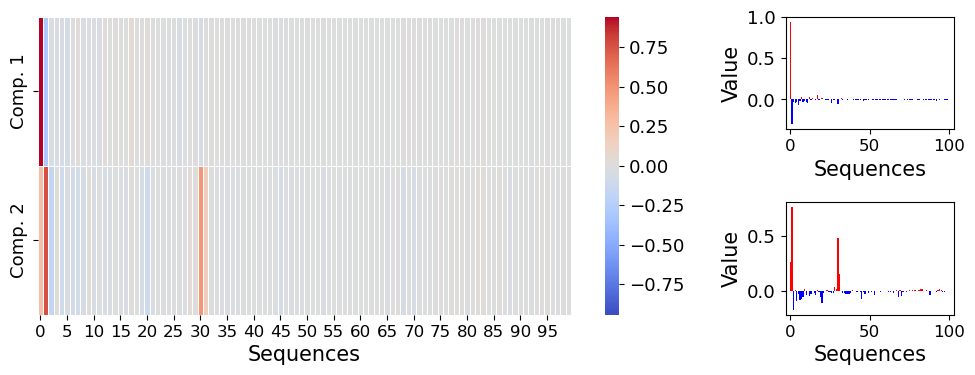

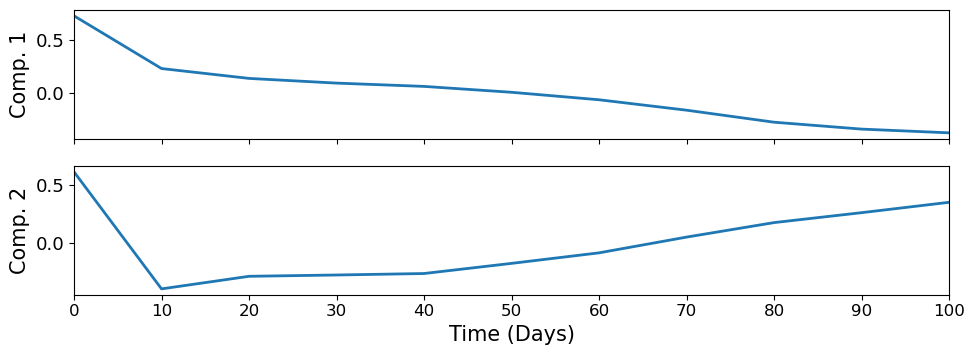

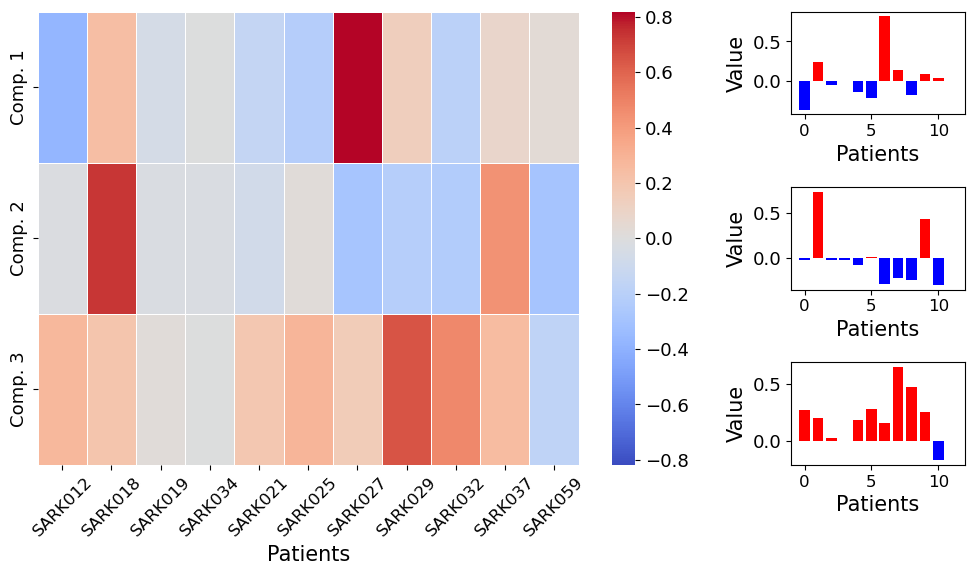

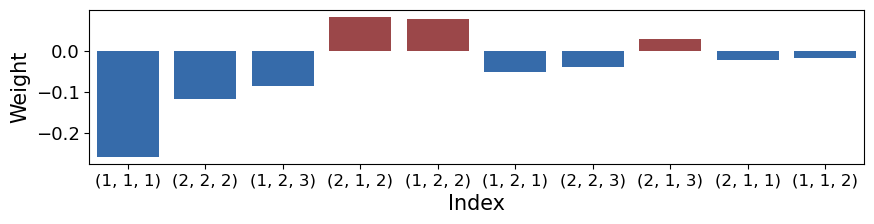


 Plotting cent_tensor_100 with ranks (5, 4, 6)


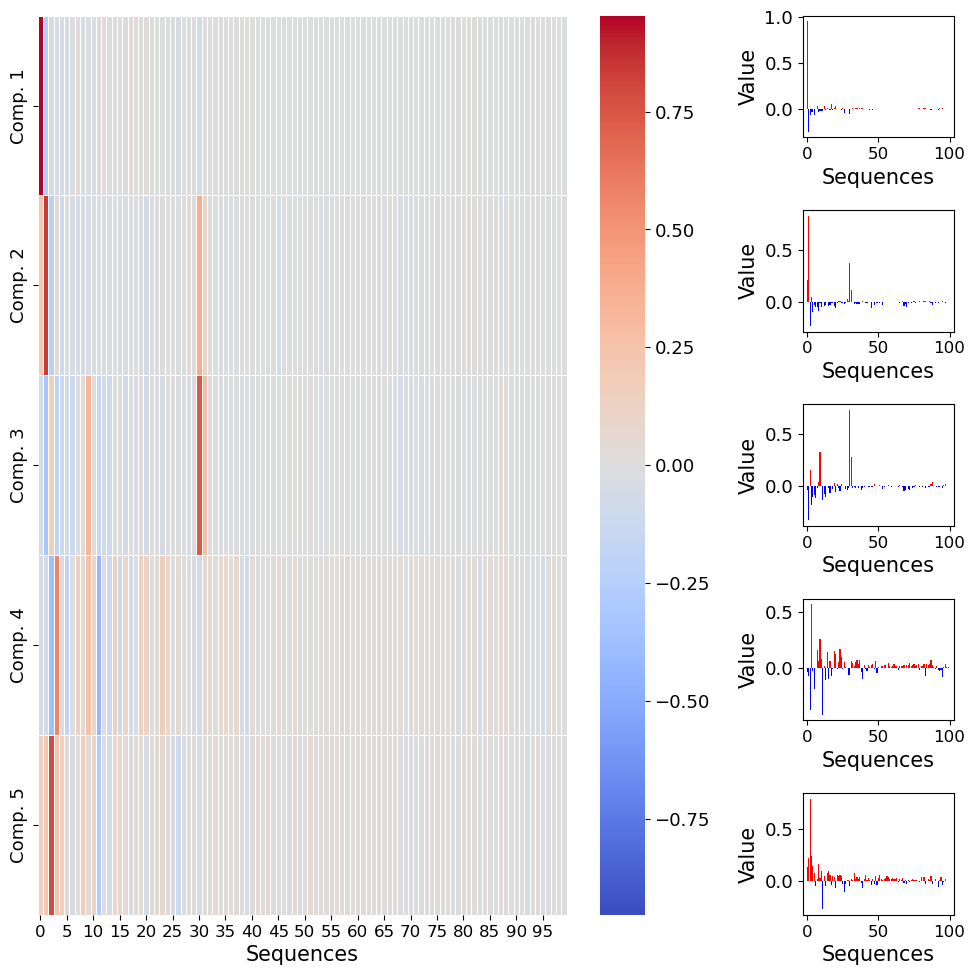

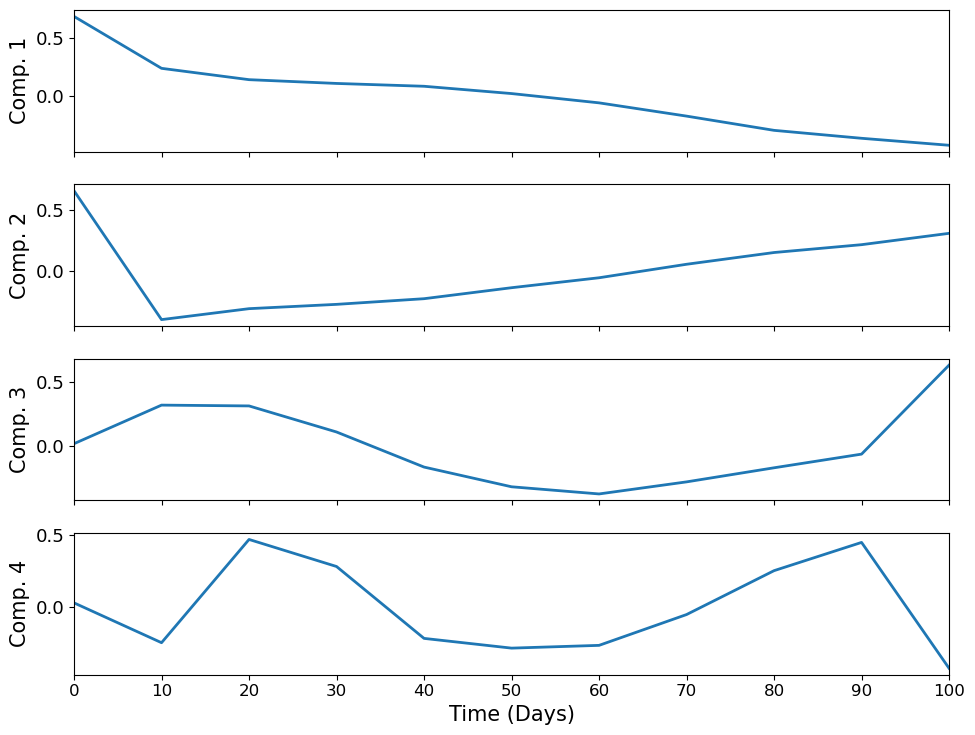

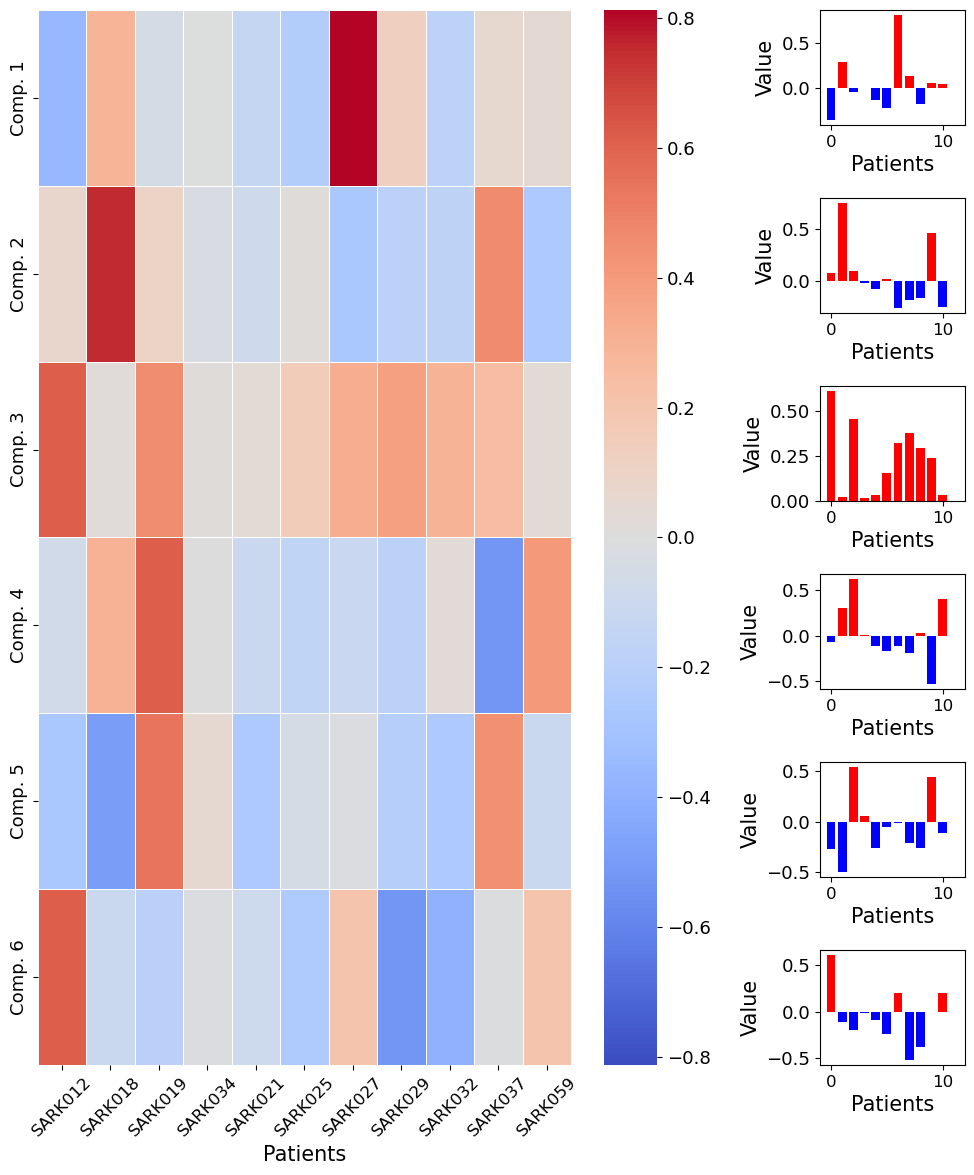

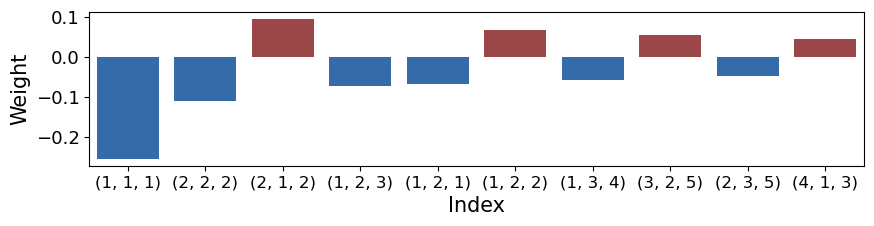


 Plotting cent_tensor_100 with ranks (5, 3, 5)


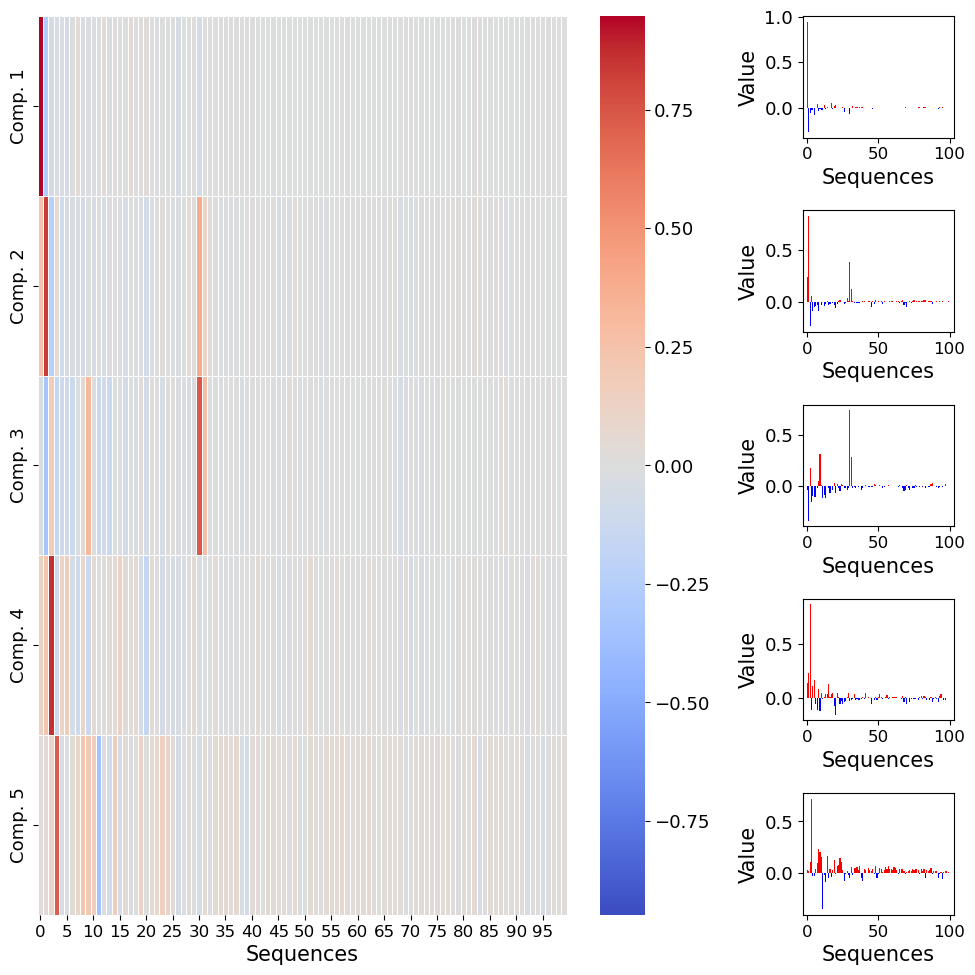

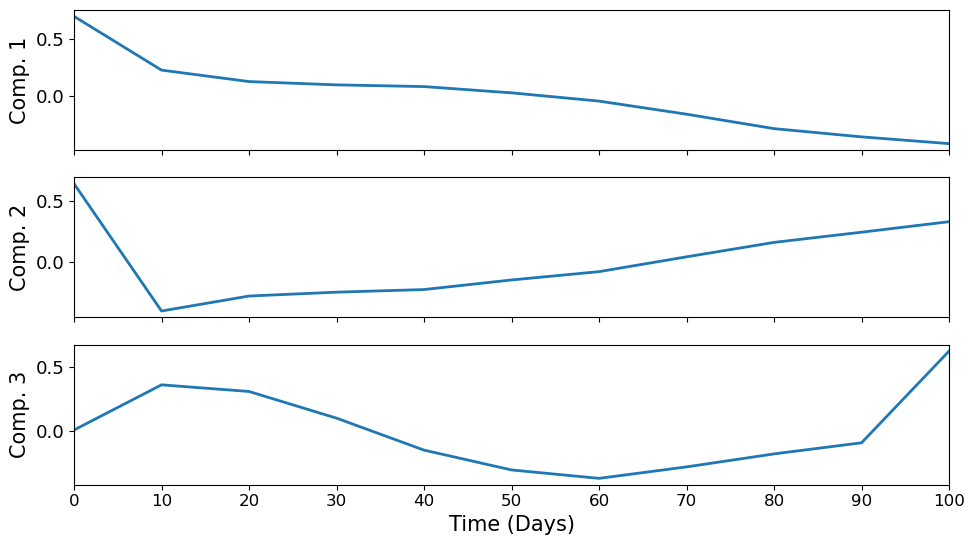

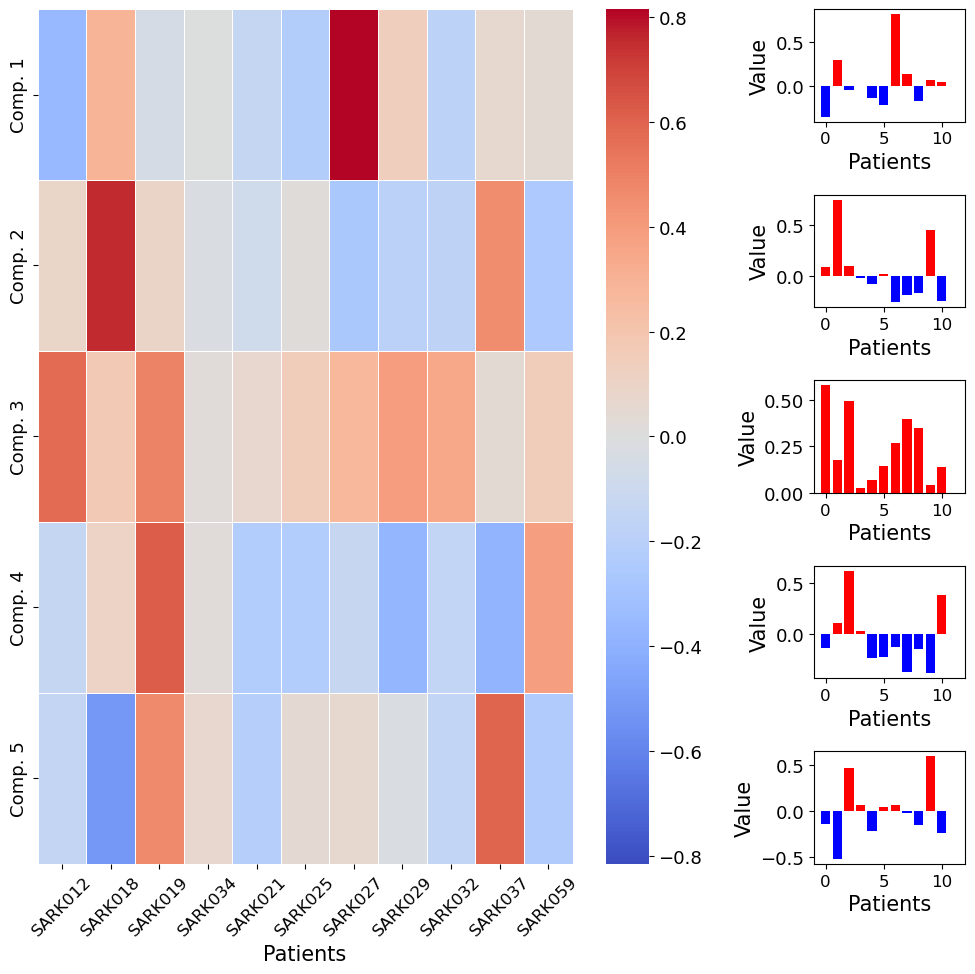

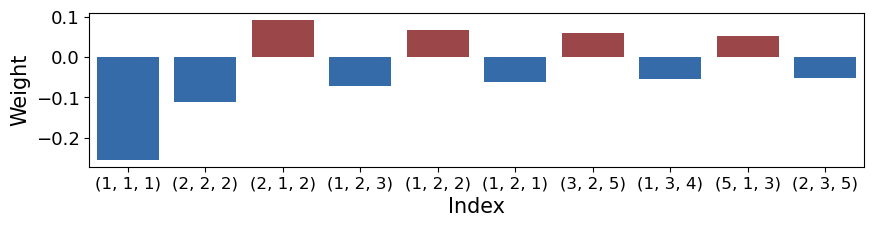


 Plotting cent_tensor_100 with ranks (15, 3, 5)


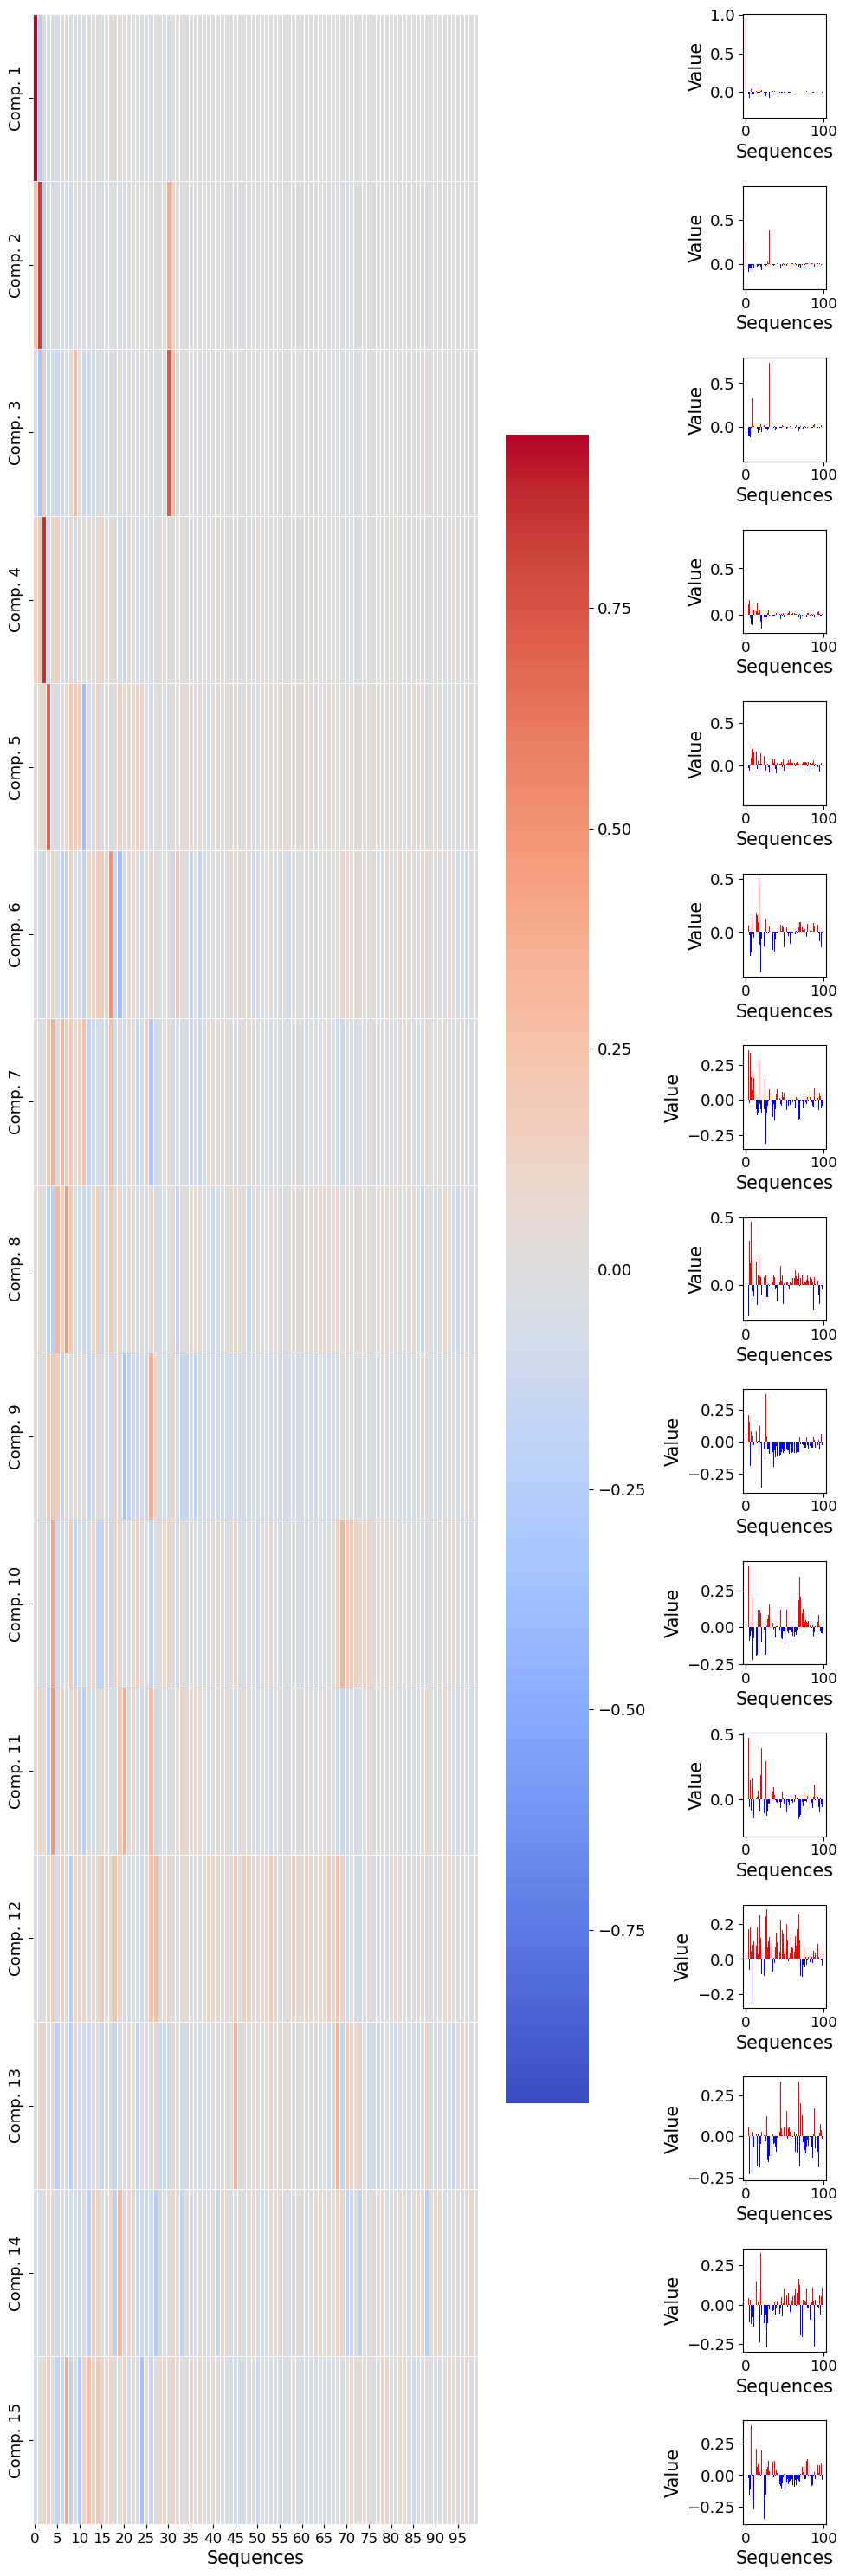

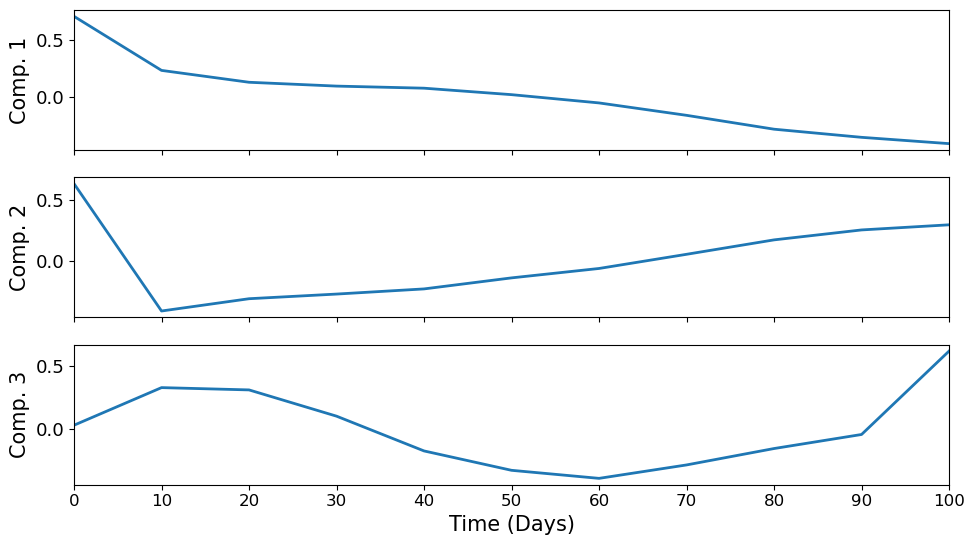

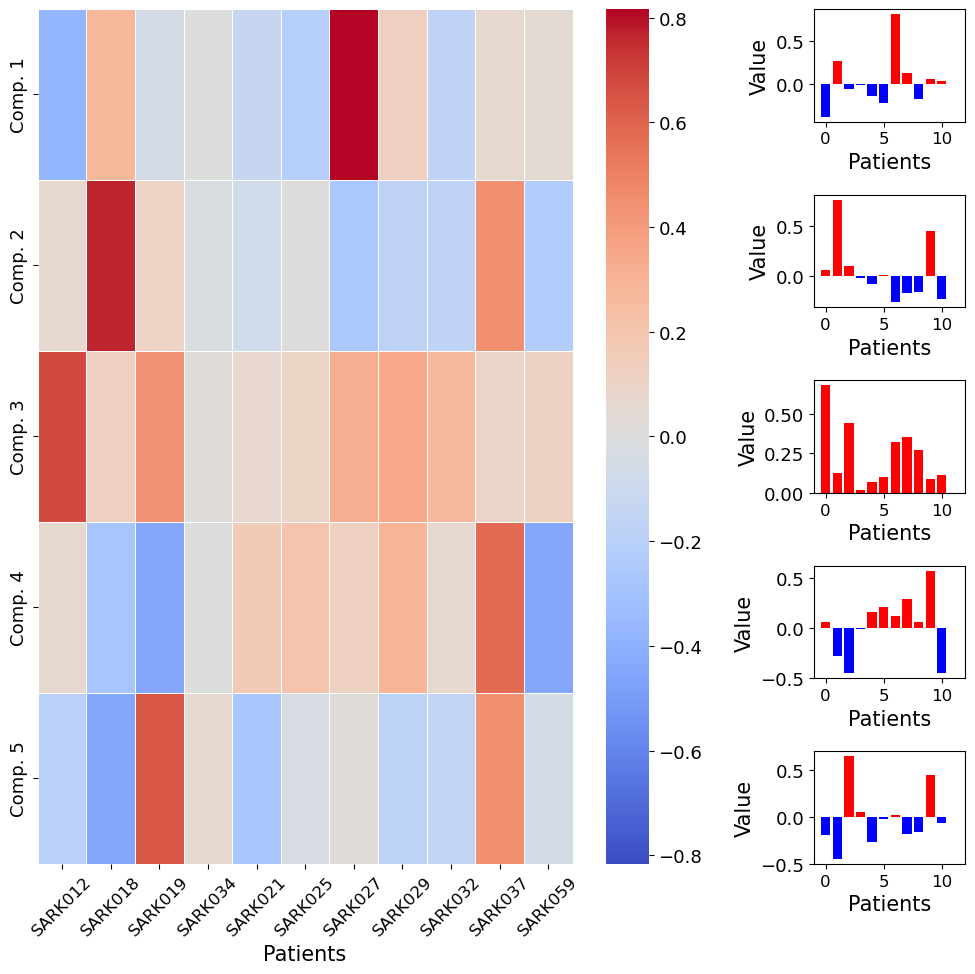

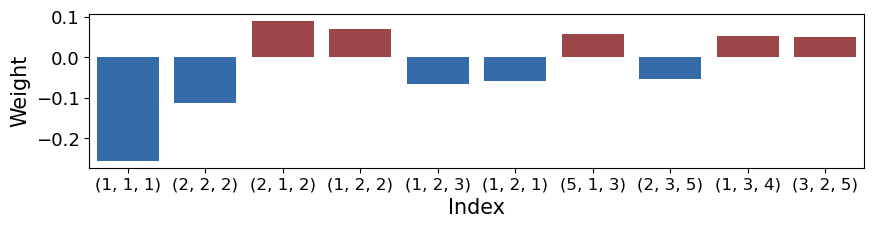


 Plotting cent_tensor_100 with ranks (8, 4, 6)


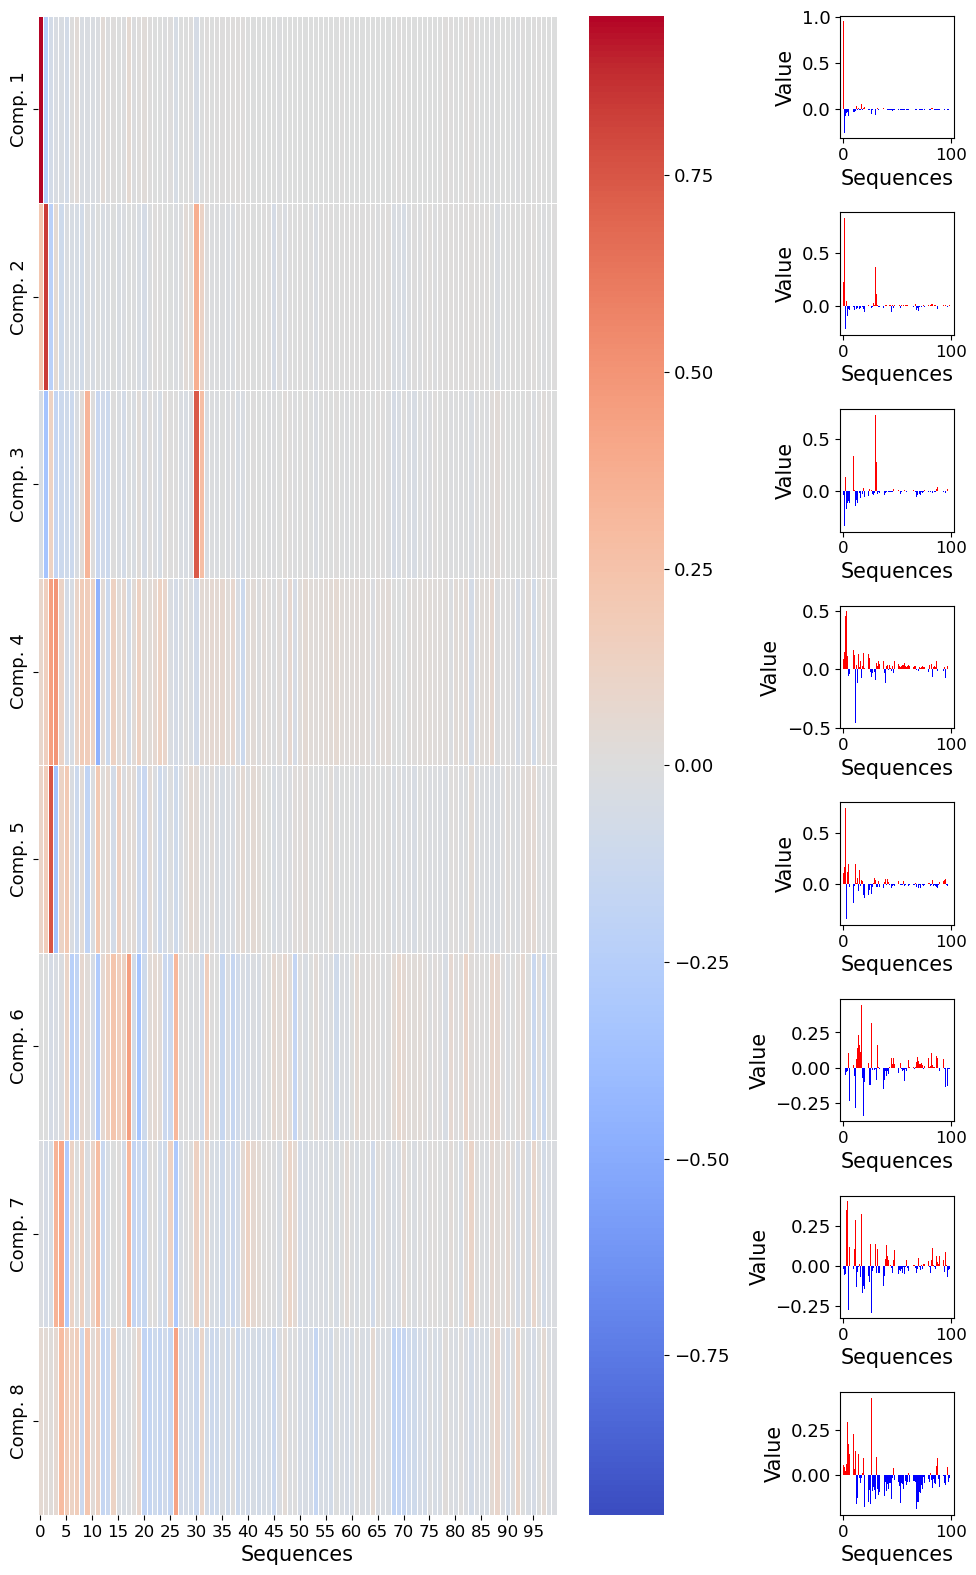

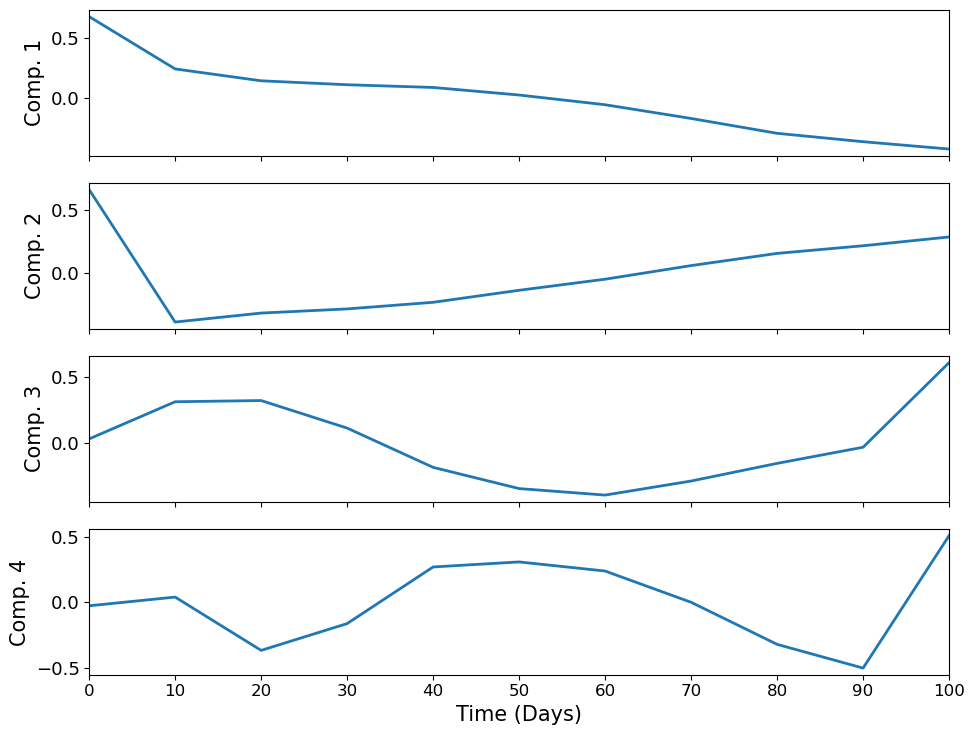

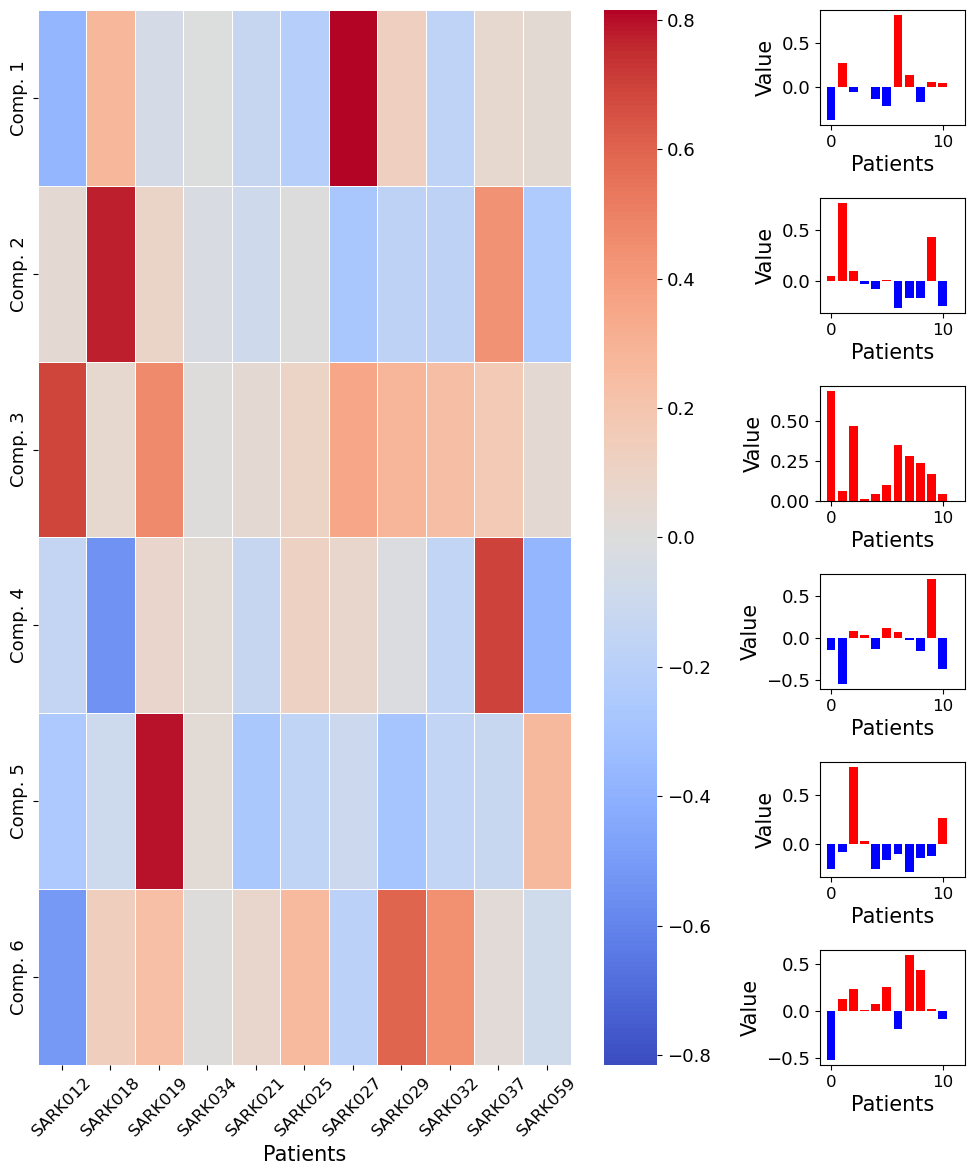

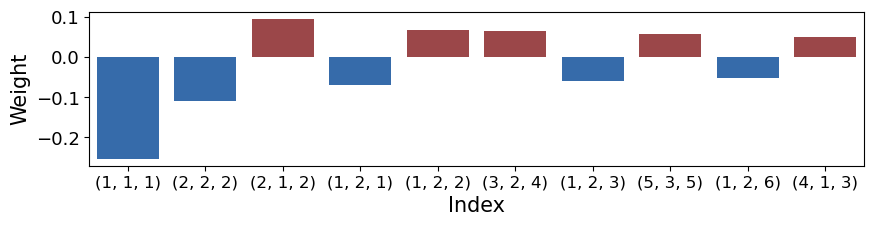

In [96]:
tensor_name = "tensor_100"
plot_all_rank_decompositions(tensor_name, type_name, tucker_results, pat_list_100)

## 200


 Checking decompositions for: cent_tensor_200
   Found rank (2, 2, 2)
   Found rank (4, 5, 6)
   Found rank (3, 3, 3)
   Found rank (12, 5, 3)
   Found rank (5, 4, 4)

 Plotting cent_tensor_200 with ranks (2, 2, 2)


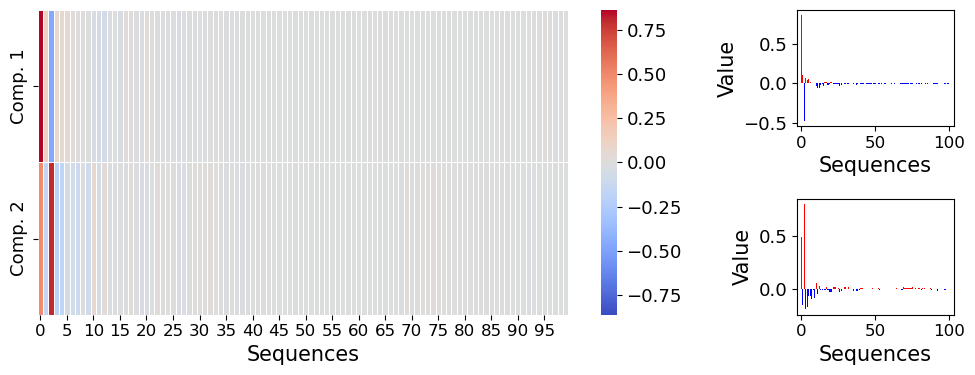

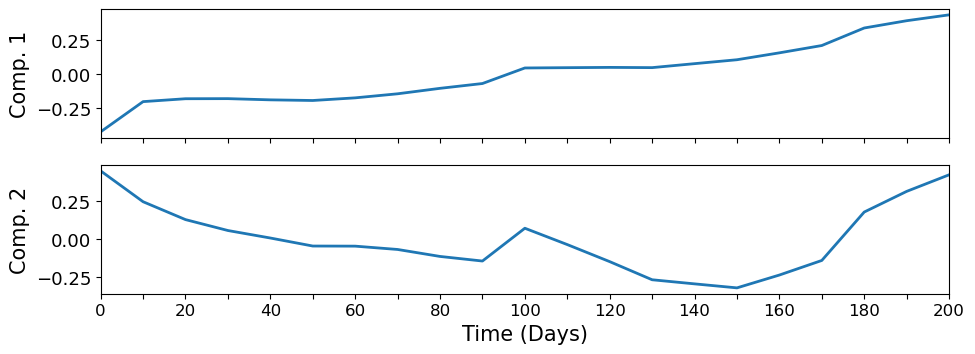

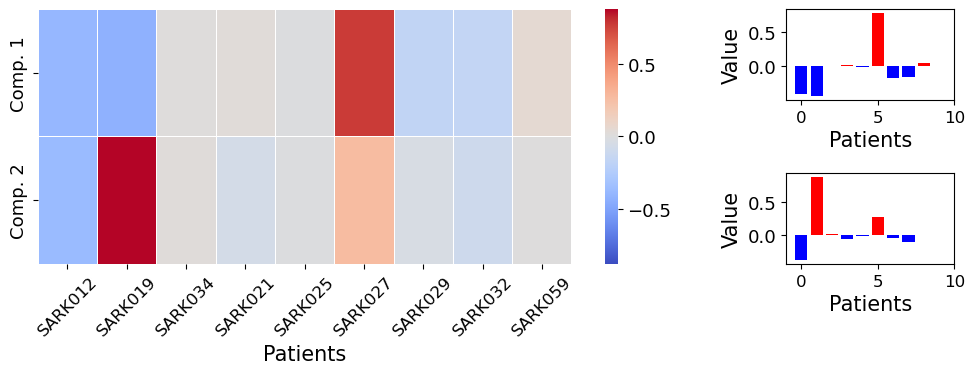

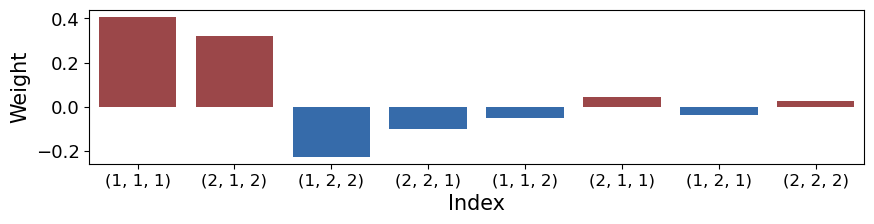


 Plotting cent_tensor_200 with ranks (4, 5, 6)


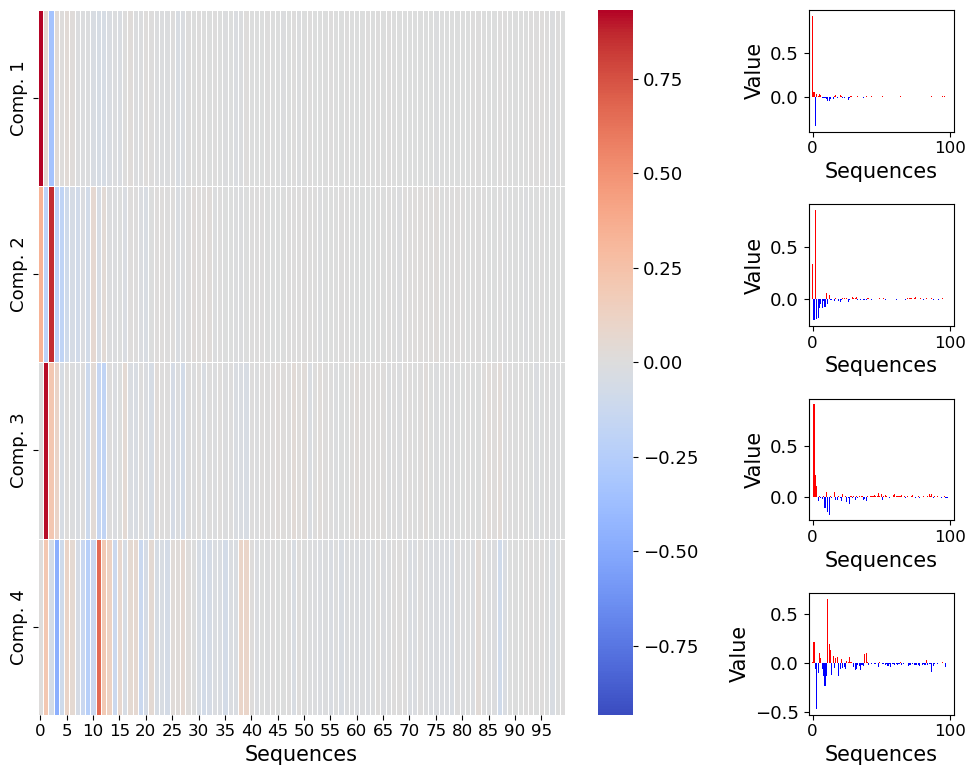

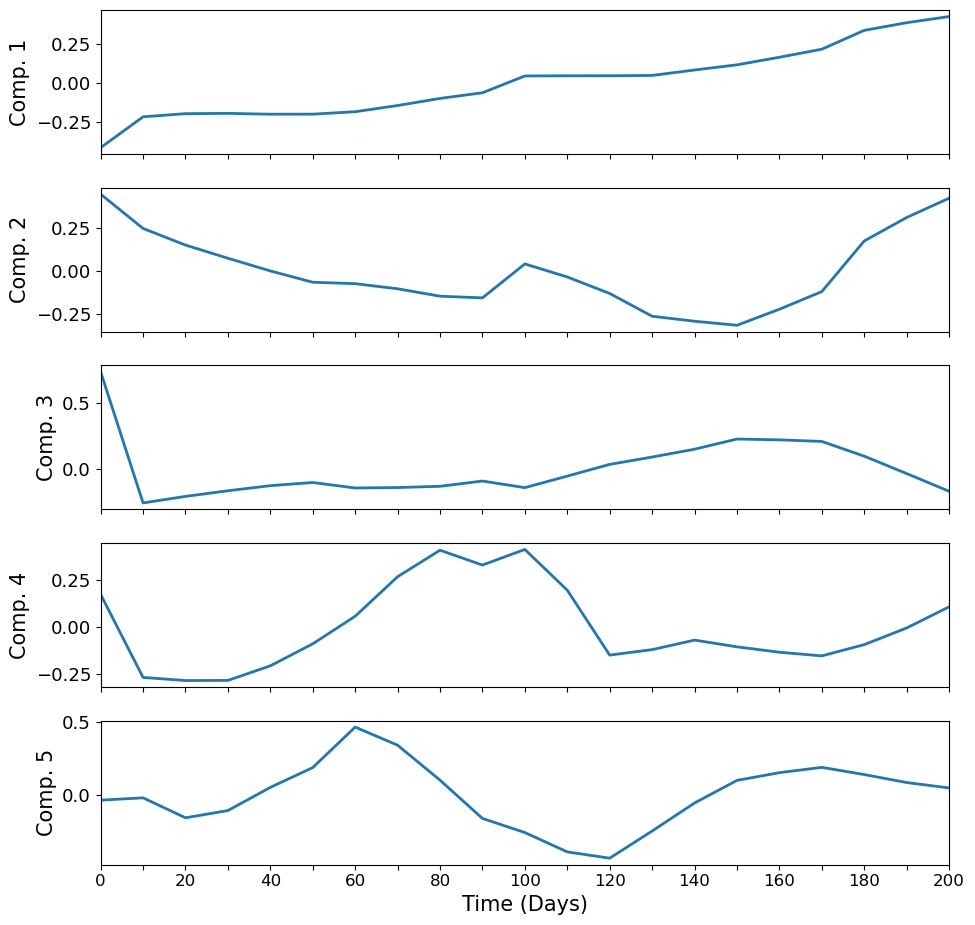

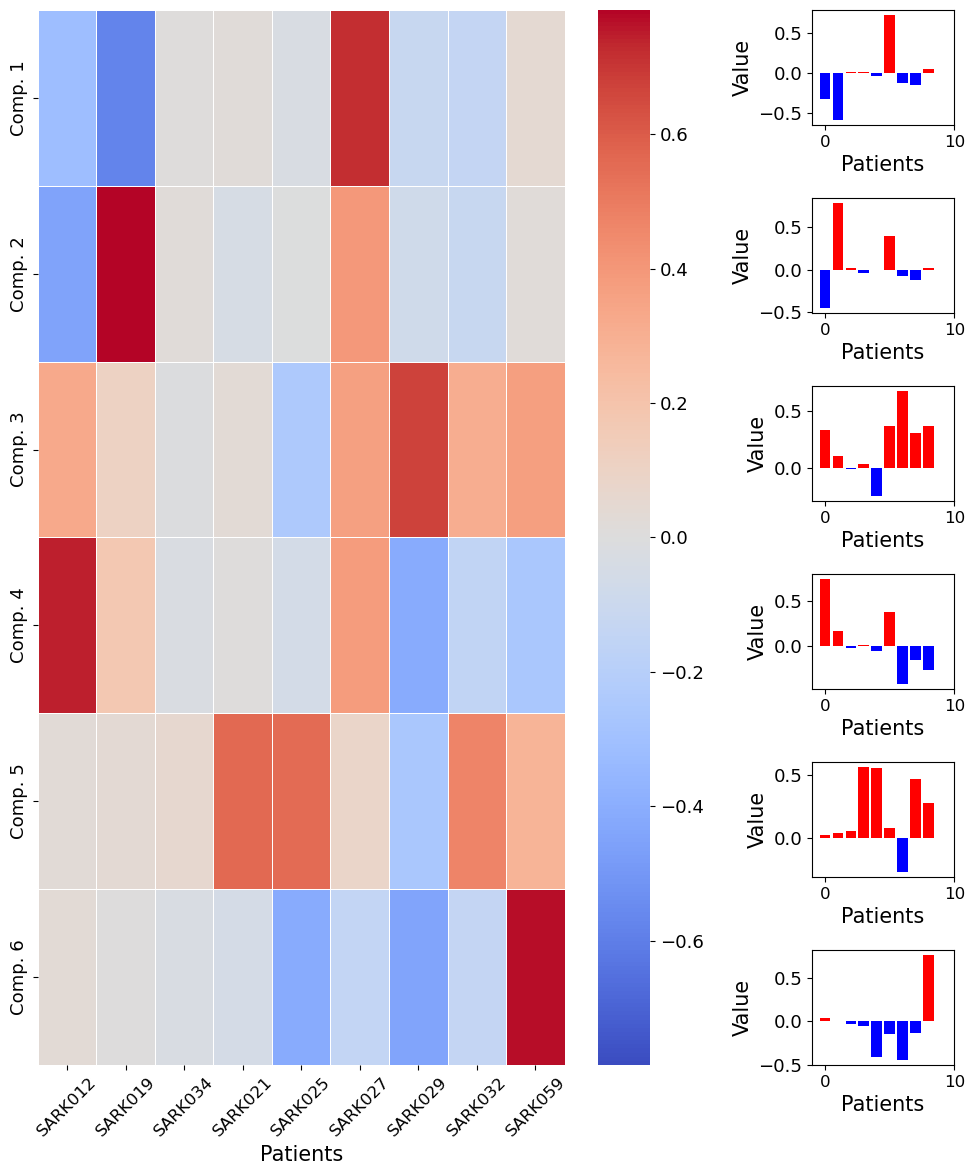

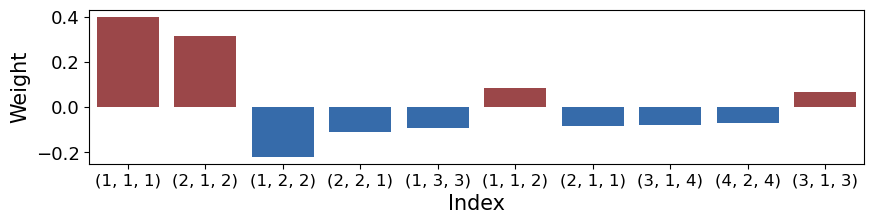


 Plotting cent_tensor_200 with ranks (3, 3, 3)


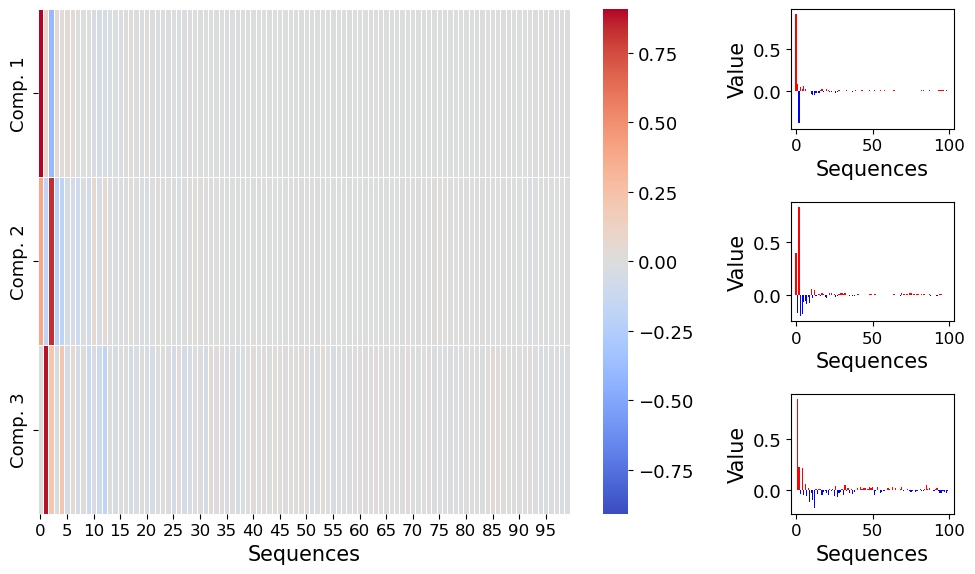

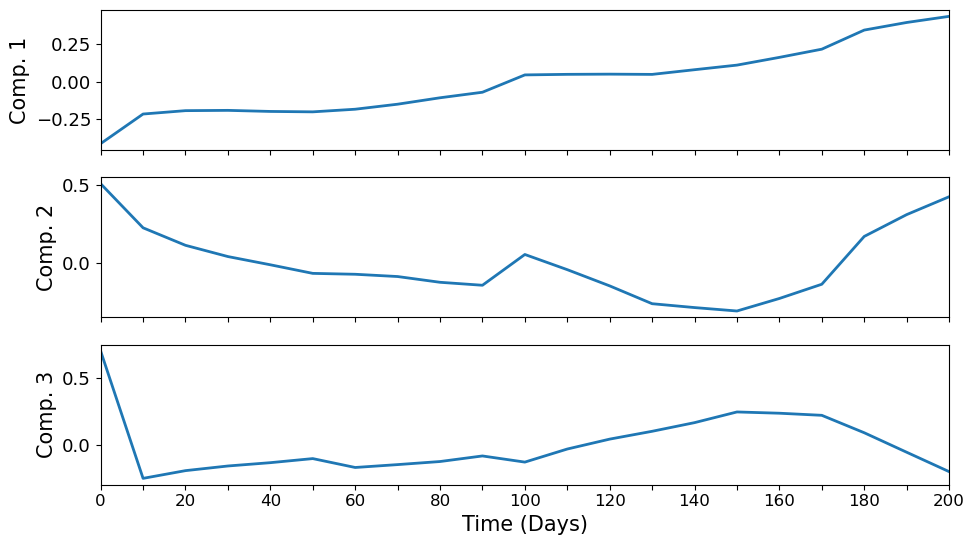

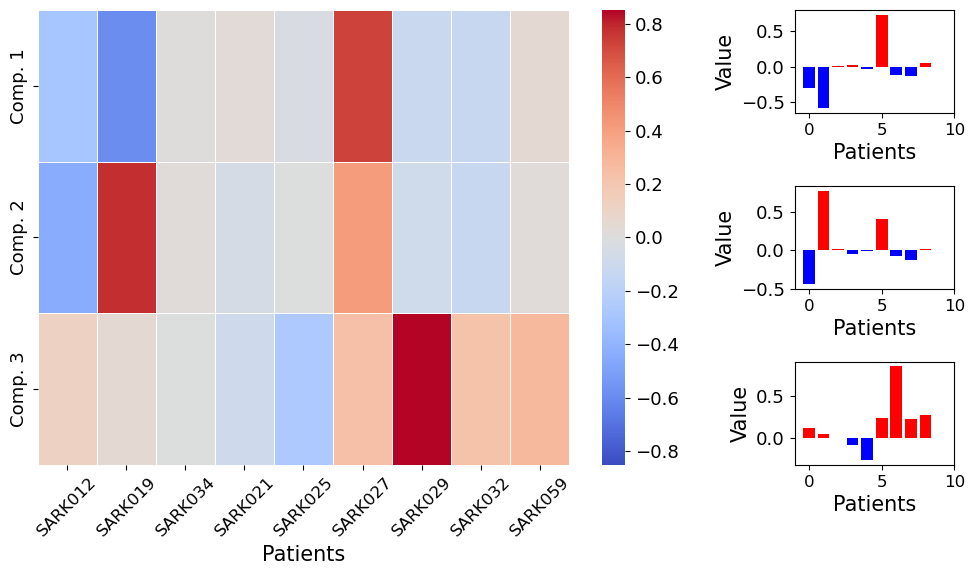

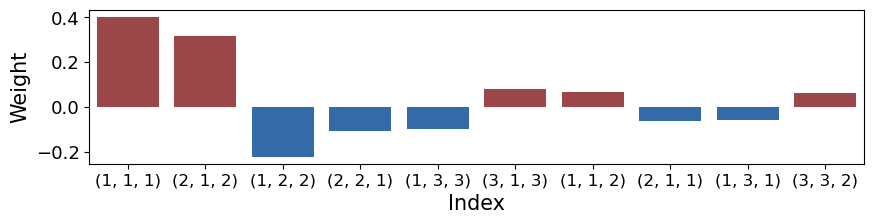


 Plotting cent_tensor_200 with ranks (12, 5, 3)


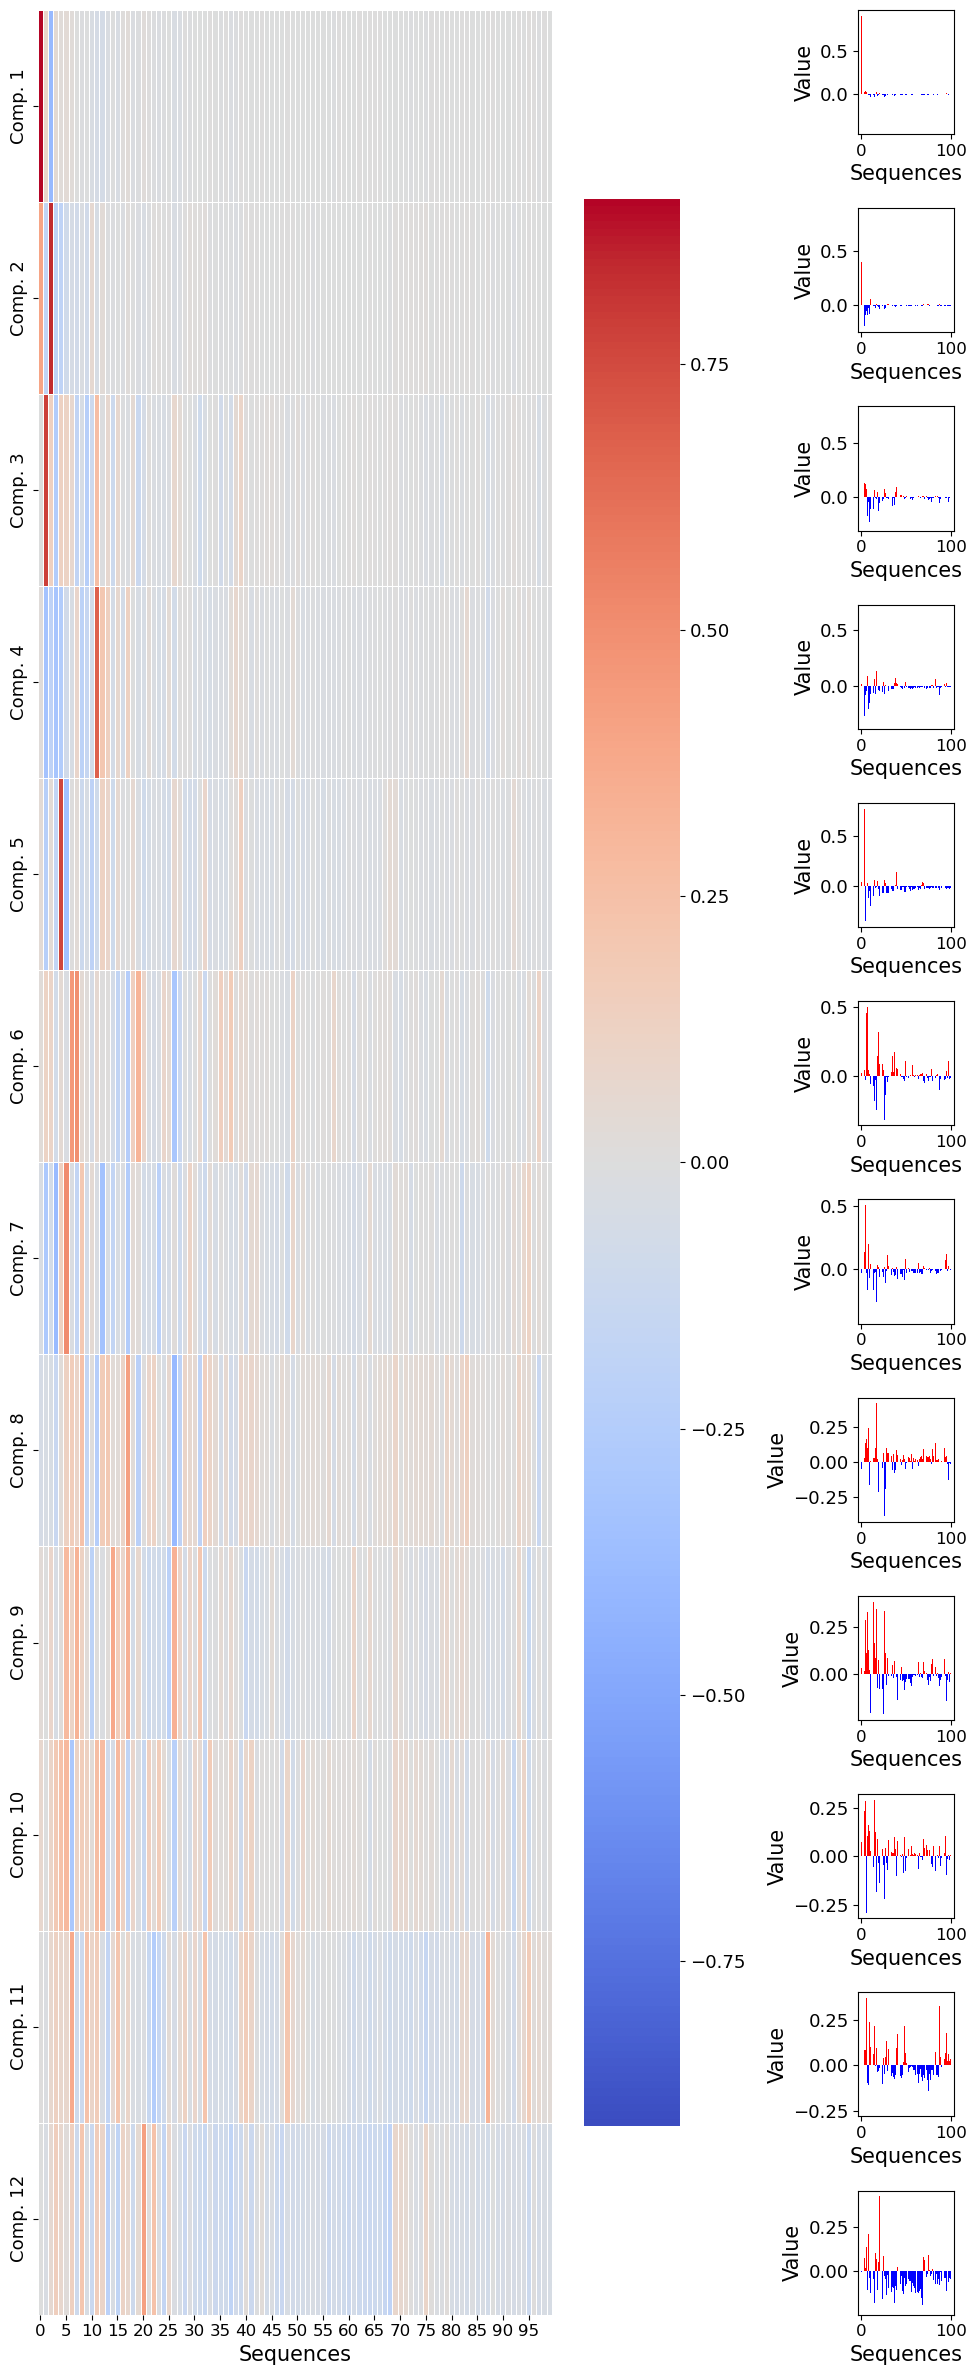

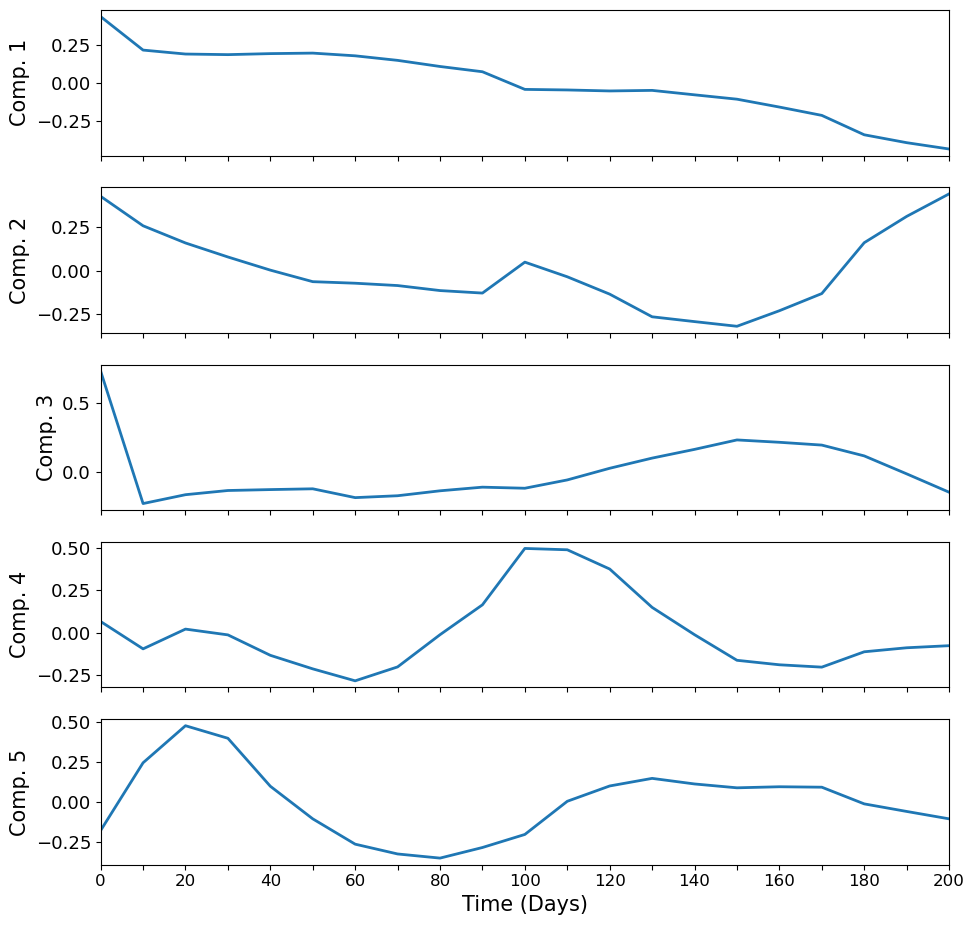

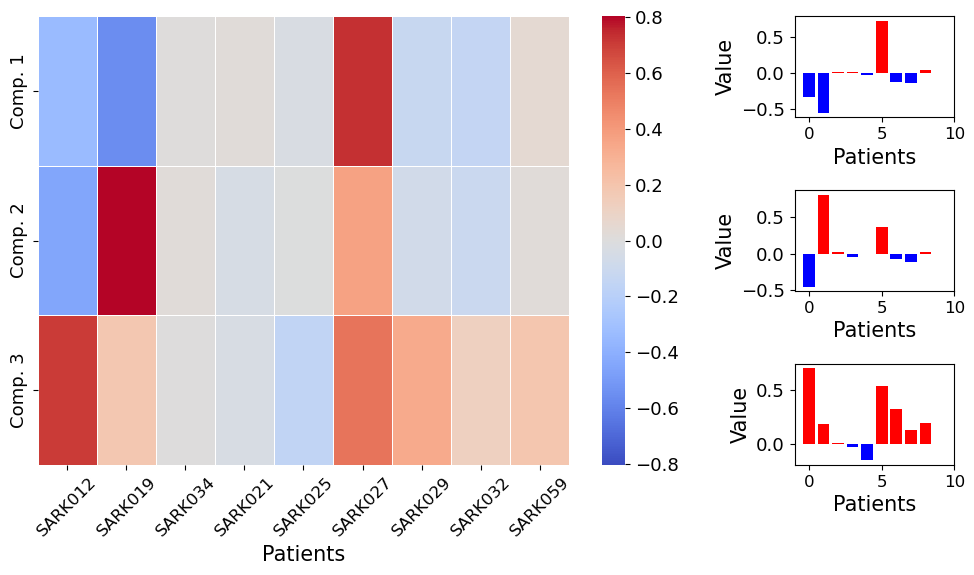

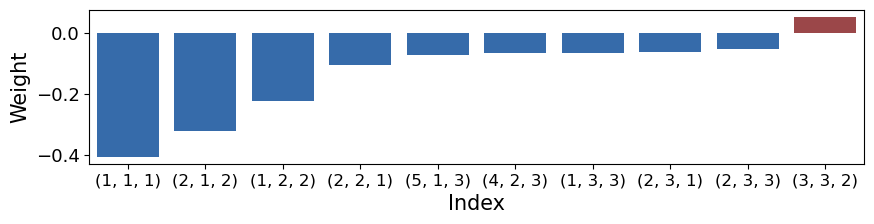


 Plotting cent_tensor_200 with ranks (5, 4, 4)


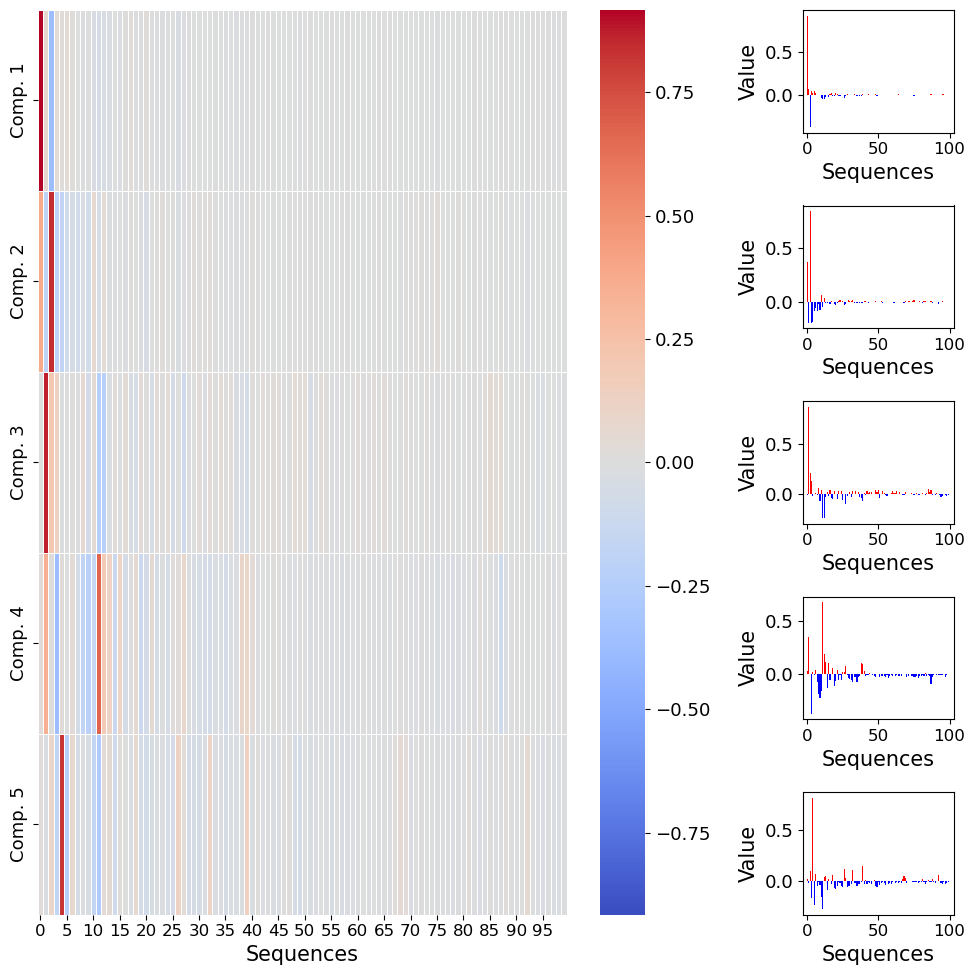

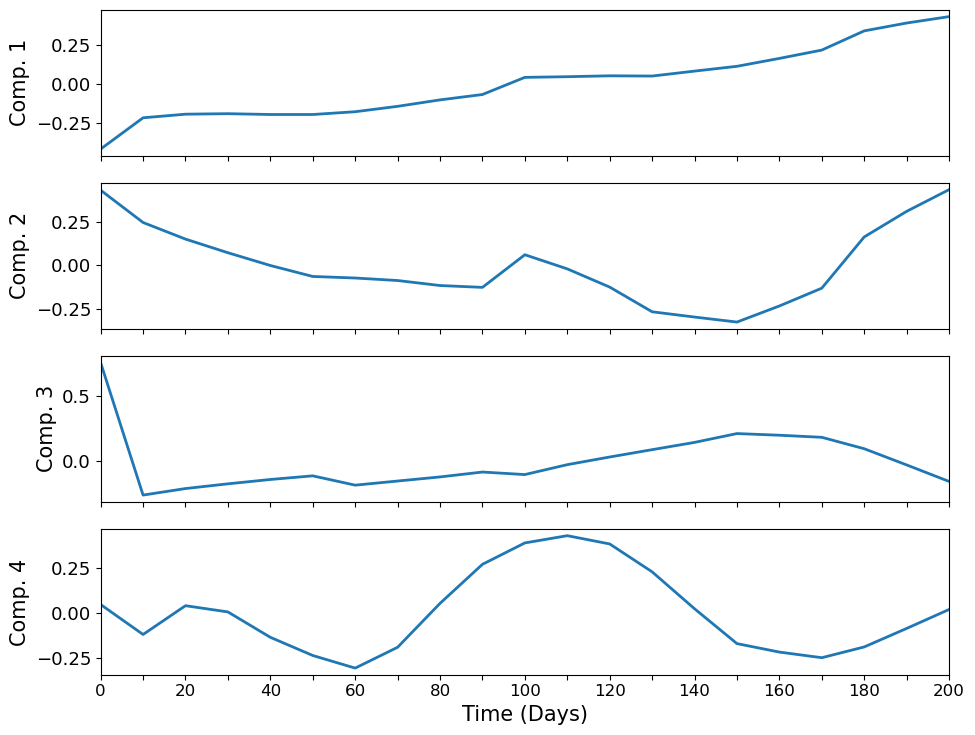

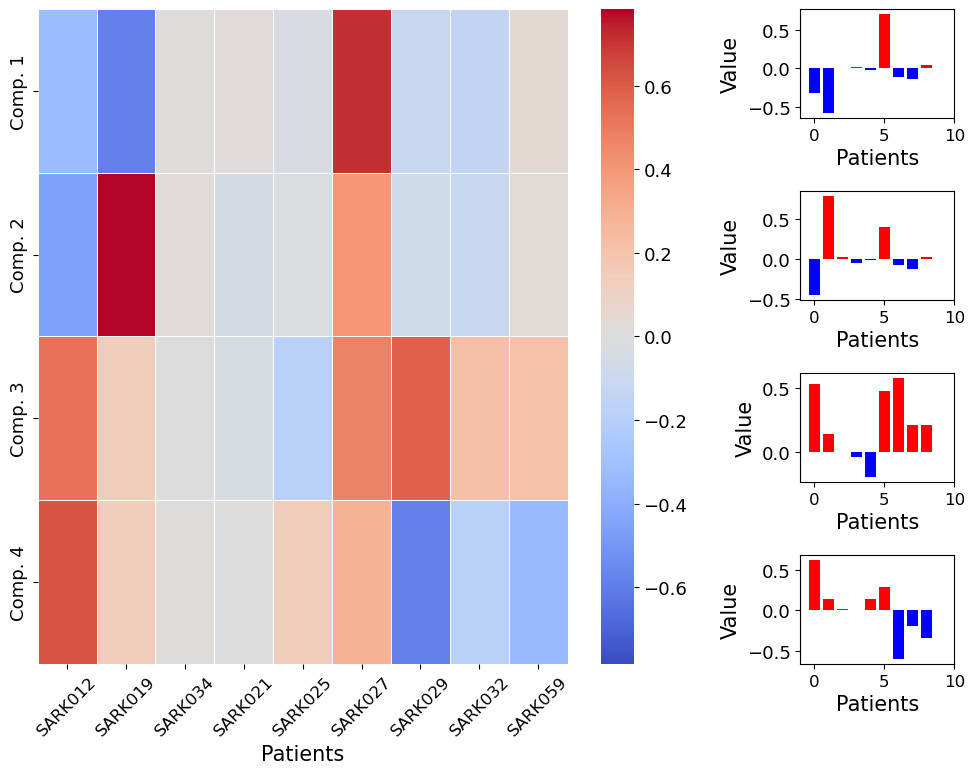

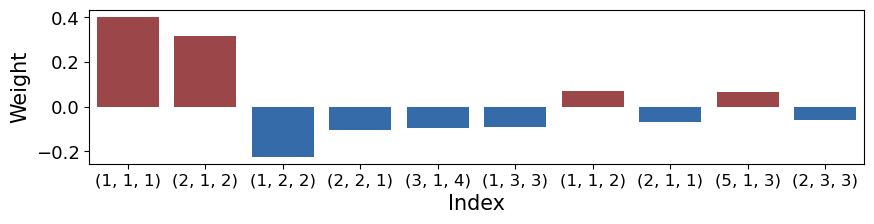

In [97]:
tensor_name = "tensor_200"
plot_all_rank_decompositions(tensor_name, type_name, tucker_results, pat_list_200)

## 300

In [1]:
tensor_name = "tensor_300"
plot_all_rank_decompositions(tensor_name, type_name, tucker_results, pat_list_300)

NameError: name 'plot_all_rank_decompositions' is not defined

# PRUEBAS

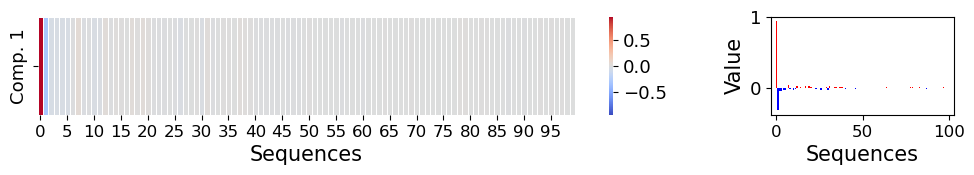

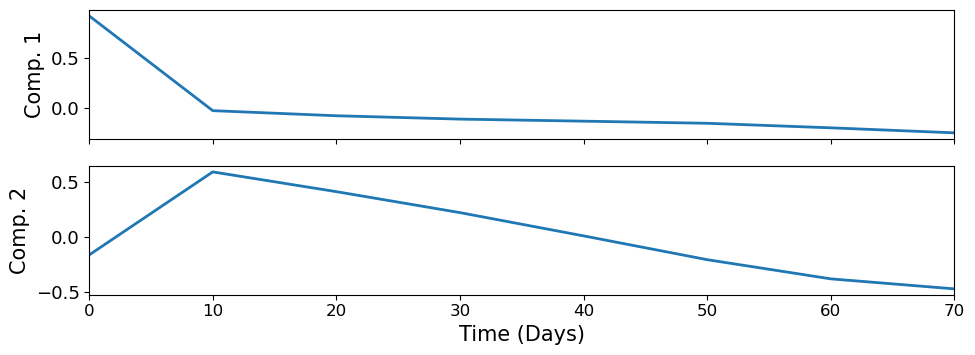

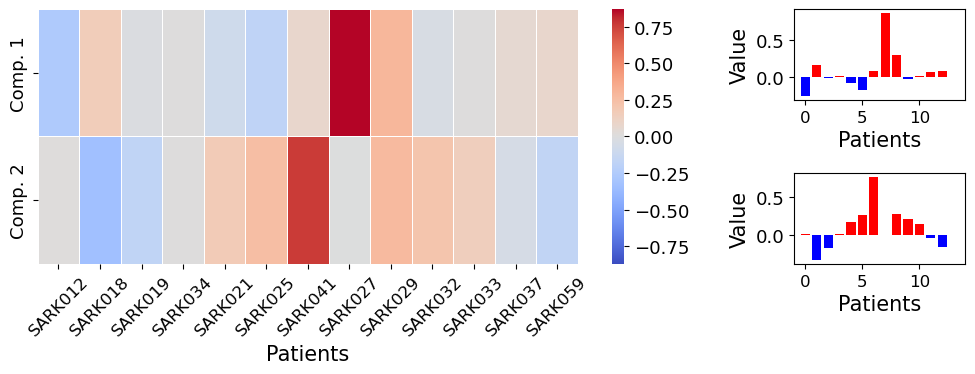

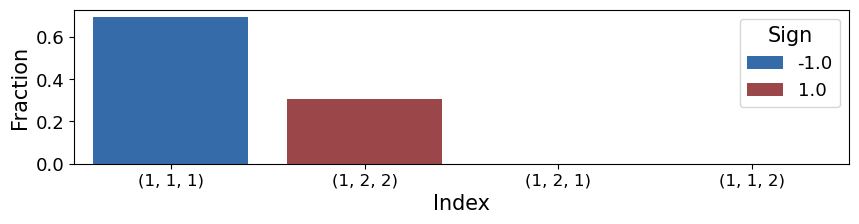

In [13]:
from tensorly.decomposition import tucker, non_negative_tucker
core, factors = tucker(tensor_70, rank=(1,2,2))
td_dic= {'core_tensor': core, 'factor_matrices': factors}
decomp_visualizations(td_dic, 'tensor_70', pat_list=pat_list_70, method='1,2,2')